<h3>Table of Content</h3>

* [1. Introduction](#1.-Introduction)
* [2. Dataset Description](#2.-Dataset-Description)
* [3. Data Preparation and Cleaning](#3.-Data-Preparation-and-Cleaning)
* [4. Exploratory and Descriptive Analyis](#4.-Exploratory-and-Descriptive-Analyis)
    * [4.1 Analysis](#4.1-Artists-Analysis)
    * [4.2 Analysis](#4.2-Songs-Analysis)
    * [4.3 Features Analysis](#4.3-Audio-Features-Analysis)
* [5. Linear Regression Model](#5.-Linear-Regression-Model)
* [6. Popularity Prediction Model](#6.-Popularity-Prediction-Model)
* [7. Summary and Limitations](#7.-Summary-and-Limitations)
    

# 1. Introduction

The legal services sector is one of the most significant part of the national economy, which had an output of billions of pounds worth business in the United Kingdom and Singapore.1 Mishcon de Reya as the leading UK law firms currently runs offices in London and Singapore needs a model to be more efficient to predict prices of law services according to the historical data to better serve the clients and, at the same time, the clients need certainty of price to facilitate decision making.  

Cost prediction is a vital process for law business in that it is a predecessor for budget prices and resource allocation in a case life cycle. Therefore, this paper presents quantitive analysis and Machine learning techniques to conduct cost analysis and predict the price of different cases.

The dataset is collected and provided by Mishcon de Reya.

# 2. Dataset Description

In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import mean_absolute_error

In [2]:
# Load data
df = pd.read_csv('Cost Prediction - Litigation.csv')

In [3]:
%%html
<style>
table {float:left}
</style>

In [4]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446591 entries, 0 to 446590
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MATTER_UNO      446591 non-null  int64  
 1   TIME_UNO        446591 non-null  int64  
 2   BASE_HRS        446591 non-null  float64
 3   BILLED_HRS      446591 non-null  float64
 4   BASE_AMT        446591 non-null  float64
 5   BILLED_AMT      446591 non-null  float64
 6   TRAN_DATE       446591 non-null  object 
 7   POST_DATE       446591 non-null  object 
 8   CLNT_MATT_CODE  446591 non-null  float64
 9   BILL_EMPL_UNO   446591 non-null  int64  
 10  PHTASK_CODE     446591 non-null  object 
 11  PHASE_DESC      446591 non-null  object 
 12  TASK_DESC       446591 non-null  object 
 13  EMPL_UNO        446591 non-null  int64  
 14  POSITION        446533 non-null  object 
 15  OPEN_DATE       446591 non-null  object 
 16  CLOSE_DATE      446092 non-null  object 
 17  INACTIVE  

*There are 446,591 rows of entry data in total available for this project.*

In [5]:
# Check legal matter numbers
pd.DataFrame(df['MATTER_UNO'].unique())

,0
0,97620
1,94332
2,100637
3,95389
4,95603
...,...
1627,149087
1628,149213
1629,149129
1630,149727


*There are 1,632 rows of matter data in total available for this project.*

**Unique Identifier Data Table:**

|**Variable**   |  **Description**  |
|:-| :-|
| **`MATTER_UNO	`** | Unique matter	number	 |
| **`EMPL_UNO`** | Unique	ID	of	the	employee	that	the	entry	relates	to|
| **`CLN_MATT_CODE`** | First 5 digits show the	client ID, the digit after the dot indicates the index of the	matter	for	this	client ID	|

<br><br><br><br><br><br>

**Continuous Variables Data Table:**

|**Variable**   |  **Description**  |
|:---| :---|
| **`BASE_HRS`** | Hours worked |
| **`BILLED_HRS`** | Hours billed|
| **`BASE_AMT`** | Worked amount in	GBP	 |
| **`BILLED_AMT`** | Billed amount in GBP|

<br><br><br><br><br><br><br><br>
**Time Related Variables:**

|**Variable**   |  **Description**  |
|:---| :---|
| **`TRAN_DATE`** | Date the entry relates to|
| **`POST_DATE`** | Date the entry was	entered	to	the	system |
| **`OPEN_DATE`** | Date when the matter was officially	opened|
| **`CLOSE_DATE`** | Date when the matter was officially closed|

<br><br><br><br><br><br><br><br>
**Categorical Variables:**

|**Variable**   |  **Description**  |
|:---| :---|
| **`BILL_EMPL_UNO`** | Unique employee ID	of	the	matter	partner	|
| **`PHTASK_CODE`** | Phase	Task	code|
| **`PHASE_DESC`** | Description	of	the	phase	|
| **`TASK_DESC`** | Description	of	the	task	|
| **`POSITION`** | Position of	the	employee	that	the	entry	relates	to|
| **`INACTIVE`** | Indicates	if	the	matter	is	closed	or	ongoing|
| **`MATT_TYPE_DESC`** | Description	of	the	matter type|
| **`MATT_TYPE_CODE`** | Code	of	the	matter type|
| **`EMPL_DEPT_NAME`** | Department	name for	the	employee	that	the	entry	relates	to	|
| **`MATT_DEPT_NAME`** | Department	name for	the	matter|
| **`ACTION_CODE`** | Code	of	the	entry’s action|
| **`ACTION_DESC`** | Description	of	the	entry's	action|

# 3. Data Preparation and Cleaning

**1) Checking null variables:**

In [6]:
# Checking null variables
df.isna().sum()

MATTER_UNO          0
TIME_UNO            0
BASE_HRS            0
BILLED_HRS          0
BASE_AMT            0
BILLED_AMT          0
TRAN_DATE           0
POST_DATE           0
CLNT_MATT_CODE      0
BILL_EMPL_UNO       0
PHTASK_CODE         0
PHASE_DESC          0
TASK_DESC           0
EMPL_UNO            0
POSITION           58
OPEN_DATE           0
CLOSE_DATE        499
INACTIVE            0
MATT_TYPE_DESC      0
MATT_TYPE_CODE      0
EMPL_DEPT_NAME      0
MATT_DEPT_NAME      0
ACTION_CODE         0
ACTION_DESC         0
dtype: int64

In [7]:
# Check matter that is not closed
df[df['CLOSE_DATE'].isna()]['MATTER_UNO'].unique()

array([136591], dtype=int64)

*As there is only one matter is not closed in our dataset, it is safe to drop all the columns related to the number 136591.*

In [8]:
# Drop the unclosed matter
df.drop(df[df.MATTER_UNO==136591].index, inplace=True)

In [12]:
#Creating a dictionary recording all the postions from EMPL_UNO and POSITIONS
df_pos = dict(list(zip(df.EMPL_UNO.astype(str), df.POSITION)))
#Check positions dictionary
df_pos

{'1994': 'Managing Associate',
 '1677': 'Legal Director, PSL',
 '1007': 'Senior Equity Partner',
 '1038': 'Senior Equity Partner',
 '1865': 'Managing Associate',
 '2246': 'Paralegal\\PA',
 '1457': 'Equity Partner',
 '1860': 'Associate',
 '1878': 'Managing Associate',
 '2301': 'Associate',
 '1892': 'Legal Assistant',
 '1601': 'Equity Partner',
 '1539': 'Equity Partner',
 '2228': 'Associate',
 '1109': 'Legal Director',
 '1554': 'Associate',
 '2029': 'Paralegal',
 '2174': 'Associate',
 '2206': 'Costs Lawyer',
 '1114': 'Senior Equity Partner',
 '2141': 'Senior Equity Partner',
 '2369': 'Paralegal',
 '2088': 'Trainee Solicitor (2nd Year)',
 '2082': 'Associate',
 '1282': 'Partner (Junior)',
 '2213': 'Paralegal',
 '2315': 'Paralegal\\PA',
 '1688': 'Legal Director',
 '1049': 'General Counsel, Partner and COLP',
 '2314': 'Senior Knowledge Analyst',
 '1120': 'Equity Partner',
 '1009': 'Senior Equity Partner',
 '2152': 'Equity Partner',
 '1111': 'Outdoor Clerk',
 '1869': 'Managing Associate',
 '2

In [13]:
# Check unique positions
len(df_pos)

775

In [192]:
# Check PHTASK_CODE, PHASE_DESC, TASK_DESC values
df[['PHTASK_CODE', 'PHASE_DESC', 'TASK_DESC']].head()

,PHTASK_CODE,PHASE_DESC,TASK_DESC
0,CB4.4A,Disclosure - Costs Budget,Disclosure
1,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs
2,.,,
3,.,,
4,.,,


Even with a few null values in dataset, there are a lot of empty values or ' .' values in the PHTASK_CODE, PHASE_DESC, TASK_DESC columns as above.

In [193]:
# Replace unusual values in columns
df = df.replace(' ', np.nan)
df = df.replace(' .', np.nan)

In [194]:
# Check null values after replacement
df.isna().sum()

MATTER_UNO           0
TIME_UNO             0
BASE_HRS             0
BILLED_HRS           0
BASE_AMT             0
BILLED_AMT           0
TRAN_DATE            0
POST_DATE            0
CLNT_MATT_CODE       0
BILL_EMPL_UNO        0
PHTASK_CODE       6142
PHASE_DESC        6142
TASK_DESC         6142
EMPL_UNO             0
POSITION            58
OPEN_DATE            0
CLOSE_DATE           0
INACTIVE             0
MATT_TYPE_DESC       0
MATT_TYPE_CODE       0
EMPL_DEPT_NAME       0
MATT_DEPT_NAME       0
ACTION_CODE          0
ACTION_DESC          0
dtype: int64

**2) Checking values formats:**

In [196]:
# Display all the columns
pd.set_option("display.max_columns", None)
df.head()

,MATTER_UNO,TIME_UNO,BASE_HRS,BILLED_HRS,BASE_AMT,BILLED_AMT,TRAN_DATE,POST_DATE,CLNT_MATT_CODE,BILL_EMPL_UNO,PHTASK_CODE,PHASE_DESC,TASK_DESC,EMPL_UNO,POSITION,OPEN_DATE,CLOSE_DATE,INACTIVE,MATT_TYPE_DESC,MATT_TYPE_CODE,EMPL_DEPT_NAME,MATT_DEPT_NAME,ACTION_CODE,ACTION_DESC
0,97620,4990545,0.5,0.5,142.5,0.00,2014-02-26 00:00:00.000,2014-02-26 00:00:00.000,44593.1,1114,CB4.4A,Disclosure - Costs Budget,Disclosure,1994,Managing Associate,2014-09-02 00:00:00.000,2020-10-09 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2314,Private,Private,ZOTHRS,Attendance on Others
1,97620,4995892,0.1,0.1,28.5,0.00,2014-02-28 00:00:00.000,2014-03-02 00:00:00.000,44593.1,1114,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1994,Managing Associate,2014-09-02 00:00:00.000,2020-10-09 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2314,Private,Private,ZOTHRS,Attendance on Others
2,94332,5005129,0.9,0.9,297.0,303.89,2014-03-06 00:00:00.000,2014-03-13 00:00:00.000,39403.3,1007,NaN,NaN,NaN,1677,"Legal Director, PSL",2014-03-13 00:00:00.000,2014-11-24 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Employment,Corporate,TEL,Telephone Calls
3,94332,5007846,0.3,0.3,99.0,101.30,2014-03-07 00:00:00.000,2014-03-13 00:00:00.000,39403.3,1007,NaN,NaN,NaN,1677,"Legal Director, PSL",2014-03-13 00:00:00.000,2014-11-24 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Employment,Corporate,COR,Correspondence
4,94332,5009329,0.2,0.2,110.0,0.00,2014-03-06 00:00:00.000,2014-05-01 00:00:00.000,39403.3,1007,NaN,NaN,NaN,1007,Senior Equity Partner,2014-03-13 00:00:00.000,2014-11-24 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Corporate,Corporate,TO,Take On


To prepare the data for prediction, we need to perform the following operations:

*There are many different values but same meanings for categories in POSITION, ACTION_DESC, task_dict, task_phase. Thus, we apply pickle files to transfer these four categories as following:*

**3) Import pickle files to replace values in POSITION, PHASE_DESC, TASK_DESC and ACTION_DESC:**

In [197]:
#import pickle files from the company
objects = []
with (open("C://python working//Dissertation Project//pos_dict.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
with (open("C://python working//Dissertation Project//action_dict_updated.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

with (open("C://python working//Dissertation Project//task_dict_updated.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
with (open("C://python working//Dissertation Project//task_phase.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [198]:
# Mapped POSITION values from pickle files
df.replace({'POSITION': objects[0]}, inplace = True)
# Mapped ACTION_DESC values from pickle files
df.replace({'ACTION_DESC': objects[1]}, inplace = True)
# Mapped ACTION_DESC values from pickle files
df.replace({'PHASE_DESC': objects[2]}, inplace = True)
# Mapped ACTION_DESC values from pickle files
df.replace({'TASK_DESC': objects[3]}, inplace = True)

In [199]:
# Check Null Values
df['POSITION'].isnull().sum()
df['ACTION_DESC'].isnull().sum()
df['PHASE_DESC'].isnull().sum()
df['TASK_DESC'].isnull().sum()

58

0

6142

6142

In [201]:
# Replace all the NaN values in PHASE_DESC and TASK_DESC by Missing values
df['PHASE_DESC'].fillna('Missing', inplace=True)
df['TASK_DESC'].fillna('Missing', inplace=True)

In [202]:
# Check null values again
df['POSITION'].isnull().sum()
df['ACTION_DESC'].isnull().sum()
df['PHASE_DESC'].isnull().sum()
df['TASK_DESC'].isnull().sum()

58

0

0

0

**After the application of pickle file, the types values have been changed as the table**

|**Categories Names**   |  **Original Categories**  |  **Mapped Categories**  |
|:---| :---| :---|
| **`POSITION`** | 71	|21
| **`ACTION_DESC`** | 10|9
| **`TASK_DESC`** | 63	|42
| **`PHASE_DESC`** | 45	| 17|

# 4. Data Exploration

#### Turning data into insights
Before the modeling step, data visualization is critical for insight. The following plots are used to gain insight.

1. `histogram`
> The histogram is an representation of the distribution of dataset. It is an estimate of the probability distribution of a continuous variable.

1. `box plot`
> A box chart (also known as a box and whisker chart) is a standardized way to show a distribution of data based on a summary of five numbers: minimum, first quartile, median, third quartile, and maximum. It's an important graph of descriptive statistics.

1. `correlation plot`/`clustermap (using hierarchical clusering)`
> The correlation matrix is a table that shows the correlation coefficients between variables. Each cell in the table shows the correlation between the two variables. ClusterMap is a correlation matrix with hierarchical clustering.

1. `scatter plot`
> A scatter plot shows the relationship between two sets of data. A scatter plot can also be called a scatter plot or scatter plot. A scatter plot shows the extent to which one variable is affected by another. This is another way of proving the correlation between two variables.

reference: https://www.klipfolio.com/resources/articles/what-is-data-visualization

**4.1 BASE_HRS, BILLED_HRS, BASE_AMT, BILLED_AMT Fees Analysis**:
<br><br>
**4.1.1 Fees Describe**:

In [203]:
# Check BASE_HRS and BILLED_HRS information
df[['BASE_HRS','BILLED_HRS']].describe()

,BASE_HRS,BILLED_HRS
count,446092.000000,446092.000000
mean,0.695985,0.690052
std,1.235662,1.227907
min,0.000000,0.000000
25%,0.100000,0.100000
50%,0.300000,0.300000
75%,0.700000,0.700000
max,24.000000,22.900000


*1. In terms of BASE_HRS and BILLED_HRS, as we can see above, the BASE_HRS and BILLED_HRS are very similar with the latter one's mean, max and std being relatively smaller, which make sense that sometimes company would give discount to clients due to some circumstances.*

*2. The 25% and 75% quantile range is (0.1 ~ 0.7 pounds) to both columns.*

In [204]:
# Check BASE_AMT and BILLED_AMT information
df[['BASE_AMT','BILLED_AMT']].describe()

,BASE_AMT,BILLED_AMT
count,446092.000000,446092.000000
mean,244.988481,214.120598
std,490.739536,1024.042253
min,0.000000,-4718.400000
25%,37.270000,23.120000
50%,85.000000,61.285000
75%,225.000000,182.772500
max,20350.000000,313668.260000


*1. For BASE_AMT and BILLED_AMT, as we can see above, the difference is much more obvious than the BASE_HRS and BILLED_HRS.*

*2. The std of BILLED_AMT is more than double of the one of BASE_AMT, showing much fluctuation, attributing to the charging fees varing in huge range in reality.*

*3. The minimum of BILLED_AMT is -4718.4, which probably result from refunding to clients after we check more negative in dataset.*

*4. The 25% and 75% quantiles of BILLED_AMT is (23 ~ 183 pounds) with BASE_AMT's being (37 ~ 225 pounds).*

*5. The mean value of BILLED_AMT relatively smaller than mean BASE_AMT due to same reason of discount.*

*6. Moreover, the max of BILLED_AMT is more than 15 times to BASE_AMT's, probably due to the urgency and emergency circumstances in reality cases, resulting much higher fees.*

*7. The much bigger range of BILLED_AMT(-4718 ~ 313,668 pounds) than BASE_AMT's (0 ~20,350 pounds) corresponds to the higher BILLED_AMT's std.*

In [205]:
# Check if the ridiculous high amound cost of entries is true or not.
df.sort_values(by='BILLED_AMT', ascending=False)

,MATTER_UNO,TIME_UNO,BASE_HRS,BILLED_HRS,BASE_AMT,BILLED_AMT,TRAN_DATE,POST_DATE,CLNT_MATT_CODE,BILL_EMPL_UNO,PHTASK_CODE,PHASE_DESC,TASK_DESC,EMPL_UNO,POSITION,OPEN_DATE,CLOSE_DATE,INACTIVE,MATT_TYPE_DESC,MATT_TYPE_CODE,EMPL_DEPT_NAME,MATT_DEPT_NAME,ACTION_CODE,ACTION_DESC
350916,104402,8941039,0.0,0.0,0.0,313668.26,2019-04-03 00:00:00.000,2019-04-03 00:00:00.000,14226.34,2150,K100.K119,Pleadings and Strategy,Fact investigation and general research (backg...,3109,Managing Associate,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,DEF,Default
193175,118961,7456367,0.0,0.0,0.0,285628.26,2017-08-01 00:00:00.000,2017-08-01 00:00:00.000,52792.10,1047,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1047,Partner,2017-05-12 00:00:00.000,2021-03-15 00:00:00.000,Y,Litigation/Arbitration/ADR - Fraud - General a...,C3521,Dispute Resolution,Dispute Resolution,DEF,Default
350940,104402,8941148,0.0,0.0,0.0,246660.81,2019-04-03 00:00:00.000,2019-04-03 00:00:00.000,14226.34,2150,K100.K119,Pleadings and Strategy,Fact investigation and general research (backg...,2150,Partner,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,DEF,Default
193177,118961,7456376,0.0,0.0,0.0,184282.17,2017-08-01 00:00:00.000,2017-08-01 00:00:00.000,52792.10,1047,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1260,Partner,2017-05-12 00:00:00.000,2021-03-15 00:00:00.000,Y,Litigation/Arbitration/ADR - Fraud - General a...,C3521,Dispute Resolution,Dispute Resolution,DEF,Default
350927,104402,8941079,0.0,0.0,0.0,163967.06,2019-04-03 00:00:00.000,2019-04-03 00:00:00.000,14226.34,2150,K100.K119,Pleadings and Strategy,Fact investigation and general research (backg...,2813,Associate,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,DEF,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167815,114910,7229554,0.0,0.0,0.0,-96.62,2017-04-26 00:00:00.000,2017-04-26 00:00:00.000,51233.10,2604,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,2775,Associate,2016-11-15 00:00:00.000,2017-11-24 00:00:00.000,Y,Litigation/Arbitration/ADR - Fraud - Cyber Adv...,C3528,Corporate,Dispute Resolution,DEF,Default
297916,125112,8404351,0.0,0.0,0.0,-169.44,2018-09-05 00:00:00.000,2018-09-05 00:00:00.000,44558.80,1539,J01.11,J01 - PRE-ACTION,11: Factual Investigation,1347,Knowledge Services,2018-02-02 00:00:00.000,2019-05-07 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Support,Private,DEF,Default
297918,125112,8404363,0.0,0.0,0.0,-265.19,2018-09-05 00:00:00.000,2018-09-05 00:00:00.000,44558.80,1539,J01.11,J01 - PRE-ACTION,11: Factual Investigation,2314,Senior Knowledge Analyst,2018-02-02 00:00:00.000,2019-05-07 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Support,Private,DEF,Default
297921,125112,8404369,0.0,0.0,0.0,-436.28,2018-09-05 00:00:00.000,2018-09-05 00:00:00.000,44558.80,1539,J01.11,J01 - PRE-ACTION,11: Factual Investigation,3296,Paralegal,2018-02-02 00:00:00.000,2019-05-07 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Private,Private,DEF,Default


*From above, we can find there are many outliers with extreme positive or negative values that does not make sense. After commmunication with company, those outliers could be execution to internal accountants, which could be dropped*

*As there are some unusual events in the datasets whose BASE_HRS, BILLED_HRS, and BASE_AMT all equal to 0, they can be dropped since they are not normal matters.*

In [206]:
# Check MATTER_UNO of all the unusual matters.
df.loc[(df['BASE_HRS']==0) & (df['BILLED_HRS']==0) & (df['BASE_AMT']==0)]

,MATTER_UNO,TIME_UNO,BASE_HRS,BILLED_HRS,BASE_AMT,BILLED_AMT,TRAN_DATE,POST_DATE,CLNT_MATT_CODE,BILL_EMPL_UNO,PHTASK_CODE,PHASE_DESC,TASK_DESC,EMPL_UNO,POSITION,OPEN_DATE,CLOSE_DATE,INACTIVE,MATT_TYPE_DESC,MATT_TYPE_CODE,EMPL_DEPT_NAME,MATT_DEPT_NAME,ACTION_CODE,ACTION_DESC
128351,104402,6812612,0.0,0.0,0.0,854.59,2016-10-24 00:00:00.000,2016-10-24 00:00:00.000,14226.34,2150,K100.K101,Pleadings and Strategy,Early Case Assessment.,1109,Legal Director,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,DEF,Default
128352,104402,6812616,0.0,0.0,0.0,226.07,2016-10-24 00:00:00.000,2016-10-24 00:00:00.000,14226.34,2150,K100.K101,Pleadings and Strategy,Early Case Assessment.,1111,Paralegal,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,DEF,Default
128353,104402,6812618,0.0,0.0,0.0,292.01,2016-10-24 00:00:00.000,2016-10-24 00:00:00.000,14226.34,2150,K100.K101,Pleadings and Strategy,Early Case Assessment.,1347,Knowledge Services,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Support,Dispute Resolution,DEF,Default
128354,104402,6812620,0.0,0.0,0.0,101.23,2016-10-24 00:00:00.000,2016-10-24 00:00:00.000,14226.34,2150,K100.K101,Pleadings and Strategy,Early Case Assessment.,1490,Outdoor clerk,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,DEF,Default
128355,104402,6812623,0.0,0.0,0.0,34183.75,2016-10-24 00:00:00.000,2016-10-24 00:00:00.000,14226.34,2150,K100.K101,Pleadings and Strategy,Early Case Assessment.,2141,Partner,2015-08-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,DEF,Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439794,139817,10338149,0.0,0.0,0.0,0.49,2020-07-08 00:00:00.000,2020-07-09 00:00:00.000,58650.30,3183,J01.11,J01 - PRE-ACTION,11: Factual Investigation,3579,Associate,2019-10-02 00:00:00.000,2021-01-25 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,J06,Internal Communications
439795,139817,10338150,0.0,0.0,0.0,0.68,2020-07-08 00:00:00.000,2020-07-09 00:00:00.000,58650.30,3183,J03.31,J03 - STATEMENTS OF CASE,31: Issue/Serve Proceedings and Preparation of...,3325,Associate,2019-10-02 00:00:00.000,2021-01-25 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,J06,Internal Communications
439796,139817,10338151,0.0,0.0,0.0,1.45,2020-07-08 00:00:00.000,2020-07-13 00:00:00.000,58650.30,3183,J13.132,J13 - ADR/SETTLEMENT,132: Other Settlement Matters,3183,Partner,2019-10-02 00:00:00.000,2021-01-25 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,J06,Internal Communications
439821,139817,10338176,0.0,0.0,0.0,0.49,2020-07-21 00:00:00.000,2020-07-21 00:00:00.000,58650.30,3183,J18.181,J18 - OUTSIDE LITIGATION PROCEDURE,181. Outside Litigation Procedural Stages,3579,Associate,2019-10-02 00:00:00.000,2021-01-25 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Dispute Resolution,Dispute Resolution,J01,Client Communications


In [207]:
# Check how many matters are unnormal
len(df.loc[(df['BASE_HRS']==0) & (df['BILLED_HRS']==0) & (df['BASE_AMT']==0)]['MATTER_UNO'].unique())

39

*39 matters is less than 2.5% of total matters, which is safe to drop*

In [208]:
# Drop unnormal values
df.drop(df.loc[(df['BASE_HRS']==0) & (df['BILLED_HRS']==0) & (df['BASE_AMT']==0)]['MATTER_UNO'].index, inplace=True)

In [209]:
# Check dataset after dropping
df.sort_values(by='BILLED_AMT', ascending=False)

,MATTER_UNO,TIME_UNO,BASE_HRS,BILLED_HRS,BASE_AMT,BILLED_AMT,TRAN_DATE,POST_DATE,CLNT_MATT_CODE,BILL_EMPL_UNO,PHTASK_CODE,PHASE_DESC,TASK_DESC,EMPL_UNO,POSITION,OPEN_DATE,CLOSE_DATE,INACTIVE,MATT_TYPE_DESC,MATT_TYPE_CODE,EMPL_DEPT_NAME,MATT_DEPT_NAME,ACTION_CODE,ACTION_DESC
101696,110905,6520223,22.0,22.0,20350.0,20350.00,2016-06-06 00:00:00.000,2016-06-06 00:00:00.000,49756.1,1060,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1060,Others (not billing),2016-06-01 00:00:00.000,2017-02-23 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Private,Private,WOR,Working
88957,108216,6386387,20.0,20.0,17000.0,17000.00,2016-03-30 00:00:00.000,2016-04-04 00:00:00.000,48828.1,1060,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1060,Others (not billing),2016-02-18 00:00:00.000,2017-06-22 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Private,Private,SUP,Supervision & Review
88960,108204,6386398,20.0,20.0,17000.0,16389.67,2016-03-28 00:00:00.000,2016-04-04 00:00:00.000,48822.1,1060,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1060,Others (not billing),2016-02-18 00:00:00.000,2018-03-12 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Private,Private,SUP,Supervision & Review
68208,99189,6190198,17.0,17.0,14450.0,13525.52,2015-07-31 00:00:00.000,2015-12-30 00:00:00.000,45203.1,1060,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1060,Others (not billing),2014-11-25 00:00:00.000,2019-02-07 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Private,Private,SUP,Supervision & Review
161452,113190,7160385,14.1,14.1,13042.5,13042.50,2017-03-27 00:00:00.000,2017-03-27 00:00:00.000,50556.1,1060,CB10.10A,ADR / Settlement discussions - Costs Budget,ADR / Settlement discussions,1060,Others (not billing),2016-09-07 00:00:00.000,2020-04-08 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,WOR,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268816,127178,8146165,0.2,0.2,125.0,0.00,2018-05-15 00:00:00.000,2018-05-20 00:00:00.000,31324.7,1055,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1055,Partner,2018-04-23 00:00:00.000,2020-08-07 00:00:00.000,Y,Litigation/Arbitration/ADR - Fraud - Fraud def...,C3519,Dispute Resolution,Dispute Resolution,ZOTHRS,Internal or Other External Communications
268811,116897,8146112,0.3,0.3,58.5,0.00,2018-05-18 00:00:00.000,2018-05-19 00:00:00.000,52011.1,1369,CB3.3A,CMC (Case Management Conference) - Costs Budget,CMC (Case Management Conference),2160,Associate,2017-02-14 00:00:00.000,2020-07-09 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Private,Private,ZOTHRS,Internal or Other External Communications
268809,122158,8146091,2.9,2.9,565.5,0.00,2018-05-18 00:00:00.000,2018-05-18 00:00:00.000,53991.1,1011,SE05.SE05,All Other Applications Not Covered Above,Interim Applications,3020,Associate,2017-09-29 00:00:00.000,2021-04-06 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Private,Support,ZDOC,Plan/Prepare/Draft/Review
446590,141887,11120703,0.1,0.1,32.0,0.00,2021-03-24 00:00:00.000,2021-03-24 00:00:00.000,61144.1,3075,J01.11,J01 - PRE-ACTION,11: Factual Investigation,3459,Associate,2019-12-19 00:00:00.000,2021-04-06 00:00:00.000,Y,Lit/Arbitration/ADR - Insurance Litigation,J4211,Dispute Resolution,Dispute Resolution,J09,Plan/Prepare/Draft/Review


<br><br>
**5.1.1 Fees Histogram**:

We analysis BASE_HRS, BILLED_HRS, BASE_AMT and BILLED_AMT of all the **ENTRIES** here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA0B625D30>,
      dtype=object)

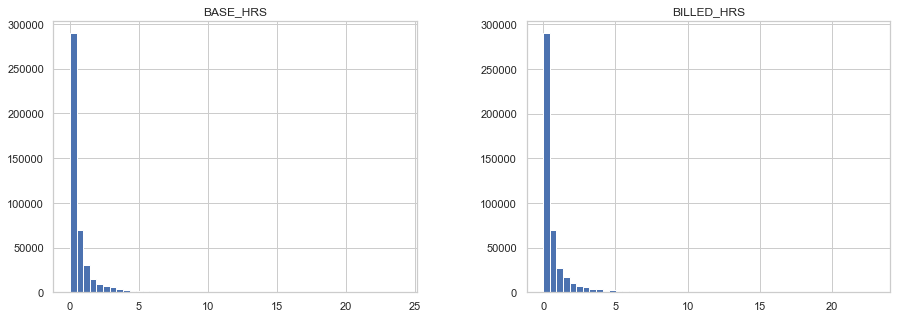

In [210]:
# Check distribution of fees related features
%matplotlib inline
df[['BASE_HRS','BILLED_HRS']].hist(bins=50, figsize=(15,5))

*The BASE_HRS and BILLED_HRS are all right skewed as the most entry the charging hours is usually not high, corresponding to the 25% and 75% range of (0.1 ~ 0.7 pounds) above.*

<br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA0AD3EEE0>,
      dtype=object)

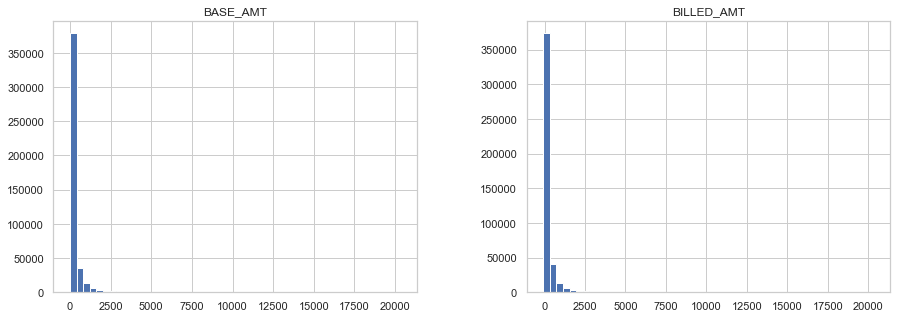

In [211]:
# Check distribution of fees related features
df[['BASE_AMT','BILLED_AMT']].hist(bins=50, figsize=(15,5))

*The BASE_AMT and BILLED_AMT are all right skewed as the most cases the charging fees per entry is usually not high, corresponding to the 25% and 75% range of BILLED_AMT (23 ~ 183 pounds) and BASE_AMT's being (37 ~ 225 pounds).*

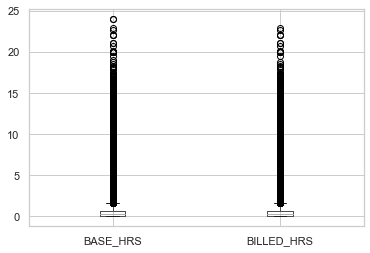

In [212]:
# Check boxplot of fees related features
boxplot = df.boxplot(column=['BASE_HRS','BILLED_HRS'])

*As we can see from above, for charging fees per hour, there are many outliers much higher than the maximum values. And they are important to company as they are high value entries*

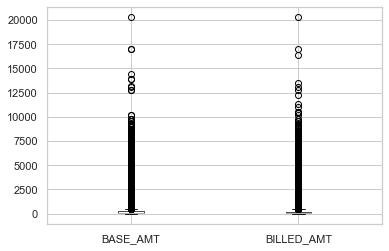

In [213]:
# Check boxplot of fees related features
boxplot = df.boxplot(column=['BASE_AMT','BILLED_AMT'])

*As we can see from above, for charging fees per entry, in BILLED_AMT, there are many outliers in reality much higher than the maximum values. And they are important to company as they are high value entries*

<br>

**4.2 TIME ANALYSIS**:

We only examine the OPEN_DATE representing the date the entrey relates to since in simulation model, we would only use some features from the start date of the matter to predict the matter's future.

In [214]:
# Check time related features
df['OPEN_DATE'].min()
df['OPEN_DATE'].max()

'2014-03-13 00:00:00.000'

'2020-11-18 00:00:00.000'

*From above we can see that the matter ranges from 2014-03-13 to 2020-11-18 more than 6 years records.*

<br>

**4.3 CATEGORIES ANALYSIS**:


#### Categorical values count

**Categorical Variables:**

|**Variable**   |  **Description**  | **Distict Values**|
|:---| :---|:---|
| **`BILL_EMPL_UNO`** | unique employee ID	of	the	matter	partner	|98
| **`PHTASK_CODE`** | Phase	Task	code|318
| **`PHASE_DESC`** | Description	of	the	phase	|121
| **`TASK_DESC`** | Description	of	the	task	|255
| **`EMPL_UNO`** | unique	ID	of	the	employee	that	the	entry	relates	to|775
| **`POSITION`** | position of	the	employee	that	the	entry	relates	to|77
| **`INACTIVE`** | indicates	if	the	matter	is	closed	or	ongoing|1
| **`MATT_TYPE_DESC`** | description	of	the	matter type|26
| **`MATT_TYPE_CODE`** | Code	of	the	matter type|26
| **`EMPL_DEPT_NAME`** | Department	name for	the	employee	that	the	entry	relates	to	|8
| **`MATT_DEPT_NAME`** | Department	name for	the	matter|6
| **`ACTION_CODE`** | Code	of	the	entry’s action|49
| **`ACTION_DESC`** | Description	of	the	entry's	action|42

In [215]:
# Check unique variables of features
len(df.BILL_EMPL_UNO.unique())
len(df.PHTASK_CODE.unique())
len(df.PHASE_DESC.unique())
len(df.TASK_DESC.unique())
len(df.EMPL_UNO.unique())
len(df.POSITION.unique())
len(df.INACTIVE.unique())
len(df.MATT_TYPE_DESC.unique())
len(df.MATT_TYPE_CODE.unique())
len(df.EMPL_DEPT_NAME.unique())
len(df.MATT_DEPT_NAME.unique())
len(df.ACTION_CODE.unique())
len(df.ACTION_DESC.unique())

98

318

126

259

775

49

1

26

26

8

6

49

42

In [216]:
# Check distinct employee number for each matter
df.groupby('MATTER_UNO').BILL_EMPL_UNO.unique()

MATTER_UNO
94332     [1007]
95389     [1011]
95472     [1120]
95543     [1120]
95603     [1060]
           ...  
149129    [4155]
149147    [2152]
149169    [4020]
149213    [2948]
149727    [2607]
Name: BILL_EMPL_UNO, Length: 1631, dtype: object

In [218]:
# Check the employees who worked on each matter
df.groupby('MATTER_UNO').EMPL_UNO.unique()

MATTER_UNO
94332                 [1677, 1007, 1038, 1865, 2246]
95389     [1860, 1109, 2206, 1554, 1490, 2200, 1111]
95472                             [1539, 2228, 2171]
95543                                   [1554, 1120]
95603                       [1878, 2301, 2029, 1060]
                             ...                    
149129                                  [4155, 1109]
149147                      [3589, 1786, 3513, 2152]
149169                                        [4082]
149213                                  [3997, 2948]
149727          [3192, 1732, 3620, 3181, 2607, 3782]
Name: EMPL_UNO, Length: 1631, dtype: object

# 5. Business Hypothesis

*Creating main datatable*

In [219]:
# Creating main datatable according to unique matter ID number
df_main = pd.DataFrame(df['MATTER_UNO'].unique())

In [220]:
# Rename column
df_main.rename(columns={0: 'MATTER_UNO'}, inplace = True)

**5.1.2 Creating total cost variable of each matter:**

**TOTAL_COST**: The total cost of each matter, consists of the sum of all entry's BILLED_AMT for every matter.

In [221]:
# Creating TOTAL_COST column of each matter
df_cost = df[['MATTER_UNO','BILLED_AMT']].groupby(['MATTER_UNO']).sum().rename(columns={'BILLED_AMT': 'TOTAL_AMT'})
#Merge total cost of each matter to main table
df_main = df_main.merge(df_cost, on='MATTER_UNO', how = 'left')



**5.1.1 TOTAL_AMT Analysis:**

<Figure size 648x216 with 0 Axes>

Text(0.5, 1.0, 'The distribution of value range')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'Total Amount of Bill (Unit 10**6 pounds)')

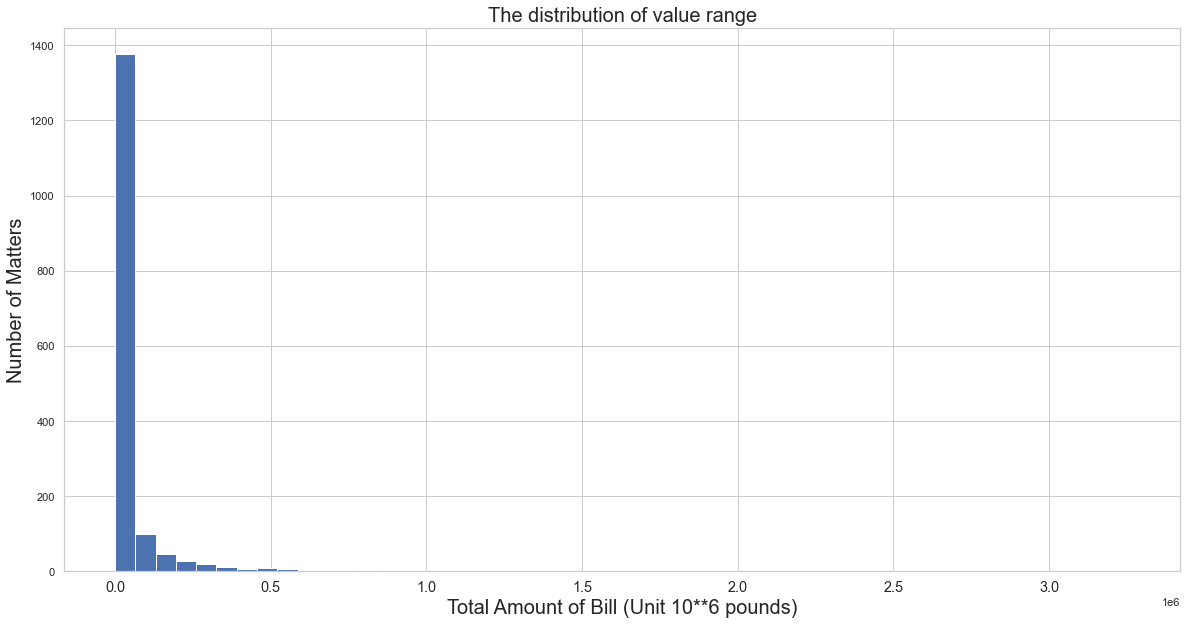

In [222]:
# Total cost distribution analysis
plt.figure(figsize=(9, 3))
sns.set(style="whitegrid")
x = df_main['TOTAL_AMT'].hist(bins=50, figsize=(20,10), xlabelsize = 'large')
x.set_title('The distribution of value range', size=20)
x.set_ylabel('Number of Matters', size=20)
x.set_xlabel('Total Amount of Bill (Unit 10**6 pounds)', size=20)

*From the histogram we can find that the distribution is highly right skewed, where the majority total cost of cases were 0. There were a few number of cases would exceed 500,000 pounds budget of costs.*

In [223]:
# Check how many matters total cost are zero.
df_main[df_main['TOTAL_AMT']==0]['MATTER_UNO']

2       100637
15       96471
34       96894
36       97378
54       97966
         ...  
1617    140587
1618    148626
1619    144280
1623    128438
1630    148514
Name: MATTER_UNO, Length: 236, dtype: int64

In [224]:
# We have 236 matters are 0 cost in total, which can be dropped.
df_main = df_main.drop(df_main[df_main.TOTAL_AMT==0].index).reset_index().drop(columns = 'index', axis=1)
df_main

,MATTER_UNO,TOTAL_AMT
0,97620,197037.00
1,94332,1500.00
2,95389,6716.67
3,95603,11192.00
4,95605,5620.00
...,...,...
1390,149147,29589.75
1391,149087,800.00
1392,149213,1720.00
1393,149129,12500.00


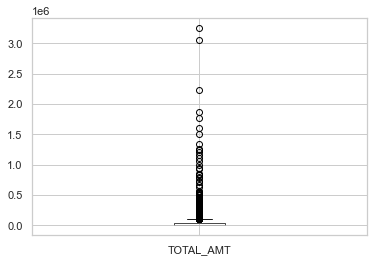

In [225]:
# Check the boxplot of total cost
boxplot = df_main.boxplot(column=['TOTAL_AMT'])

In [226]:
# Check quantiles of total cost
quantiles = df_main['TOTAL_AMT'].quantile([0.00, 0.25, 0.5, 0.75, 1.00])
quantiles

0.00        150.00
0.25       4371.25
0.50      11618.50
0.75      42618.25
1.00    3257822.26
Name: TOTAL_AMT, dtype: float64

*From the boxplot we can find that the 25th percentile is 4,371 pounds, median is 11,618 pounds and 75th percentile is 42,618 pounds. So we can build up a target variable to rank from 0 - 3 to indicate the value of that matter.*

**5.2 Creating Target:**

**VALUE_RANGE**: We assign number from 0-3 to determine the value of a matter. 3 representing the highest value matter and 0 presenting the lowest value ones.

1. TOP_VALUE: If the total cost is more than 75% threshold, assign '3' to the matter.
2. HIGH_VALUE: If the total cost is more than 50% threshold, assign '2' to the matter.
3. MEAN_VALUE: If the total cost is more than 25% threshold, assgin '1' to the matter.
4. NORMAL_VALUE: If the total cost is below than 25% threshold, assgin '0' to the matter.

|**Level**   |  **Values Range (Pounds)**  | **Assigned Number**  |
|:---| :---|:---|
| **`TOP VALUE`** | 42,618 - ∞  |3|
| **`HIGH VALUE`** | 11,618 - 42,618 |2|
| **`MED VALUE`** | 4,371 - 11,618  |1|
| **`NOR VALUE`** | 0 - 4,371  |0|

In [227]:
# Create VALUE_RANGE variable and check the number of people in each range
df_main['VALUE_RANGE'] = pd.DataFrame(pd.qcut(df_main['TOTAL_AMT'], 4,labels = False))

In [228]:
# Check the total matter numbers in different VALUE_RANGE
df_main[['MATTER_UNO','VALUE_RANGE']].groupby('MATTER_UNO').mean().groupby('VALUE_RANGE').size()
df_val = df_main[['MATTER_UNO','VALUE_RANGE']].groupby('MATTER_UNO').mean().groupby('VALUE_RANGE').size()

VALUE_RANGE
0    349
1    349
2    348
3    349
dtype: int64

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'The distribution of value range')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'Value Range')

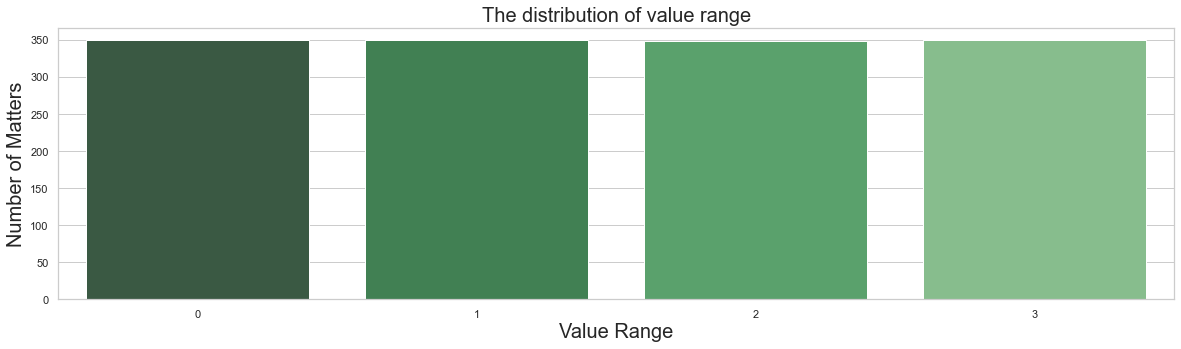

In [229]:
# Check the distribution of each value range
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
x = df_val
ax = sns.barplot(x.index, x,palette=("Greens_d"))
ax.set_title('The distribution of value range', size=20)
ax.set_ylabel('Number of Matters', size=20)
ax.set_xlabel('Value Range', size=20)

*From above we could find the value range is equally distributed.*

**5.3 Set Up Business Hypothesis:**

|**Hypothesis**   |  **Data From**  |**Feature Names**|
|:---| :---|:---|
| **`The times individual clients have worked with, higher value range it is`** | Indicat by the number after dot in CLNT_MATT_CODE|PAST_ENGAGEMENT|
| **`The times of entries of each matter in 60 days, higher value range`** | Count the entries of each matter	|NOW_ENGAGEMENT|
| **`As Times of preparation increases in 60 days, value range increases`** | Count the pre-action phases of each matter|PRE_TIMES|
| **`As total cost increases in 60 days, value range increases`** | Sum up the total cost of pre-action phases of each matter|PRE_COST|
| **`More Senior positons for the matter partner, higher value range`** | Get values from BILL_EMPL_UNO| POSITION_PARTNER|
| **`More senior and more staff for the matter in 60 days, higher value range`** | Sum up the numerical number of staff for the matter| NUM_POSITION|
| **`Corporate matter time is generally in higher value range than private ones`** | One hot encoding the MATT_DEPT_NAME|MATT_DEPT_NAME|


**General idea would be to use cost in pre-action, and total values of staff in pre-action as variables to predict the price range.**

# 6. Feature Building and Selection

**6.1 Time related features**

Creating a column as DAYS_SPENT derived from CLOSE_DATE minus OPEN_DATE. Then to drop all the matters below 90 days.

In [138]:
# Creating DAYS_SPENT, indicating how many days spent in total for each matter
df['DAYS_SPENT'] = pd.to_datetime(df['CLOSE_DATE']) - pd.to_datetime(df['OPEN_DATE'])
df[['MATTER_UNO', 'DAYS_SPENT']]

,MATTER_UNO,DAYS_SPENT
0,97620,2229 days
1,97620,2229 days
2,94332,256 days
3,94332,256 days
4,94332,256 days
...,...,...
446586,140157,520 days
446587,141887,474 days
446588,141887,474 days
446589,141887,474 days


In [139]:
#Check rows of TRAN_DATE ahead of OPEN_DATE to find the earliest open date
df[df['TRAN_DATE']<df['OPEN_DATE']]

,MATTER_UNO,TIME_UNO,BASE_HRS,BILLED_HRS,BASE_AMT,BILLED_AMT,TRAN_DATE,POST_DATE,CLNT_MATT_CODE,BILL_EMPL_UNO,PHTASK_CODE,PHASE_DESC,TASK_DESC,EMPL_UNO,POSITION,OPEN_DATE,CLOSE_DATE,INACTIVE,MATT_TYPE_DESC,MATT_TYPE_CODE,EMPL_DEPT_NAME,MATT_DEPT_NAME,ACTION_CODE,ACTION_DESC,DAYS_SPENT
0,97620,4990545,0.5,0.5,142.5,0.00,2014-02-26 00:00:00.000,2014-02-26 00:00:00.000,44593.1,1114,CB4.4A,Disclosure - Costs Budget,Disclosure,1994,Managing Associate,2014-09-02 00:00:00.000,2020-10-09 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2314,Private,Private,ZOTHRS,Internal or Other External Communications,2229 days
1,97620,4995892,0.1,0.1,28.5,0.00,2014-02-28 00:00:00.000,2014-03-02 00:00:00.000,44593.1,1114,CB1.1A,Pre-action costs - Costs Budget,Pre-action costs,1994,Managing Associate,2014-09-02 00:00:00.000,2020-10-09 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2314,Private,Private,ZOTHRS,Internal or Other External Communications,2229 days
2,94332,5005129,0.9,0.9,297.0,303.89,2014-03-06 00:00:00.000,2014-03-13 00:00:00.000,39403.3,1007,NaN,Missing,Missing,1677,"Legal Director, PSL",2014-03-13 00:00:00.000,2014-11-24 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Employment,Corporate,TEL,Telephone Calls,256 days
3,94332,5007846,0.3,0.3,99.0,101.30,2014-03-07 00:00:00.000,2014-03-13 00:00:00.000,39403.3,1007,NaN,Missing,Missing,1677,"Legal Director, PSL",2014-03-13 00:00:00.000,2014-11-24 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Employment,Corporate,COR,Correspondence,256 days
4,94332,5009329,0.2,0.2,110.0,0.00,2014-03-06 00:00:00.000,2014-05-01 00:00:00.000,39403.3,1007,NaN,Missing,Missing,1007,Partner,2014-03-13 00:00:00.000,2014-11-24 00:00:00.000,Y,Litigation/Arbitration/ADR - Commercial litiga...,C2610,Corporate,Corporate,TO,Take On,256 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444749,149147,10573377,0.6,0.6,300.0,0.00,2020-10-21 00:00:00.000,2020-10-29 00:00:00.000,63748.1,2152,J01.13,J01 - PRE-ACTION,13: Pre-action Protocol (or Similar) Work,2152,Partner,2020-10-23 00:00:00.000,2021-03-01 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Private,Private,J03,Other Side Communications,129 days
444750,149147,10573378,0.3,0.3,150.0,0.00,2020-10-21 00:00:00.000,2020-10-29 00:00:00.000,63748.1,2152,J13.132,J13 - ADR/SETTLEMENT,132: Other Settlement Matters,2152,Partner,2020-10-23 00:00:00.000,2021-03-01 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Private,Private,J01,Client Communications,129 days
444751,149147,10573380,0.2,0.2,100.0,100.00,2020-10-21 00:00:00.000,2020-10-29 00:00:00.000,63748.1,2152,J13.132,J13 - ADR/SETTLEMENT,132: Other Settlement Matters,2152,Partner,2020-10-23 00:00:00.000,2021-03-01 00:00:00.000,Y,Litigation/arbitration/ADR - Private Client - ...,J2313,Private,Private,J03,Other Side Communications,129 days
444811,149213,10581240,2.2,2.2,990.0,990.00,2020-10-19 00:00:00.000,2020-11-02 00:00:00.000,63775.1,2948,J01.12,J01 - PRE-ACTION,12: Legal Investigation,3997,Managing Associate,2020-10-28 00:00:00.000,2021-03-19 00:00:00.000,Y,Lit/Arbitration/ADR - Insurance Litigation,J4211,Dispute Resolution,Dispute Resolution,J09,Plan/Prepare/Draft/Review,142 days


In [140]:
#Check how many matters the 'TRAN_DATE' are ealier than 'OPEN_DATE' 
len(df['MATTER_UNO'][df['TRAN_DATE']<df['OPEN_DATE']].unique())

1378

*There are 1378 matters whose TRAN_DATE is ahead of OPEN_DATE. It means this situation is all over matters. In this case, we need to set earliest date between TRAN_DATE and OPEN_DATE as start date of matter.*

In [141]:
#Check if there are any matters POST_DATE is later than CLOSE_DATE
df['MATTER_UNO'][df['POST_DATE']>df['CLOSE_DATE']]

Series([], Name: MATTER_UNO, dtype: int64)

In [142]:
# get the earliest DATE among all the TRAN_DATE to each matter
df_start = df[['MATTER_UNO','TRAN_DATE']].groupby('MATTER_UNO').min().rename(columns={'TRAN_DATE':'FIRST_TRAN_DATE'})
df = df.merge(df_start, on='MATTER_UNO', how = 'left')

In [143]:
# Check date of each matter
df[['MATTER_UNO','TRAN_DATE', 'FIRST_TRAN_DATE']]

,MATTER_UNO,TRAN_DATE,FIRST_TRAN_DATE
0,97620,2014-02-26 00:00:00.000,2014-02-26 00:00:00.000
1,97620,2014-02-28 00:00:00.000,2014-02-26 00:00:00.000
2,94332,2014-03-06 00:00:00.000,2014-03-06 00:00:00.000
3,94332,2014-03-07 00:00:00.000,2014-03-06 00:00:00.000
4,94332,2014-03-06 00:00:00.000,2014-03-06 00:00:00.000
...,...,...,...
444590,140157,2021-03-15 00:00:00.000,2019-10-08 00:00:00.000
444591,141887,2021-03-15 00:00:00.000,2019-12-18 00:00:00.000
444592,141887,2021-03-15 00:00:00.000,2019-12-18 00:00:00.000
444593,141887,2021-03-23 00:00:00.000,2019-12-18 00:00:00.000


In [144]:
# Get the earliest date between FIRST_TRAN_DATE and OPEN_DATE as the START_DATE to eachmatter
df_start = df[['MATTER_UNO','TRAN_DATE', 'FIRST_TRAN_DATE']].groupby('MATTER_UNO').min()

In [145]:
# Check if there is any date not equal to the earliest date
df_start[df_start['TRAN_DATE'] != df_start['FIRST_TRAN_DATE']]

,TRAN_DATE,FIRST_TRAN_DATE
MATTER_UNO,,


In [147]:
# Merge the earliet TRAN_DATE AS START_DATE to the datetable
df_start=df_start.rename(columns={'TRAN_DATE' : 'START_DATE'})
df = df.merge(df_start, on='MATTER_UNO', how = 'left')

In [148]:
# Drop the Dates used to find the earliest start_date
df.drop(columns = ['FIRST_TRAN_DATE_x', 'FIRST_TRAN_DATE_y'], inplace = True)

In [149]:
# Create new DAYS_SPENT, as the days spent should be the one from ealiest START_DATE to final CLOSE_DATE.
df['DAYS_SPENT'] = pd.to_datetime(df['CLOSE_DATE']) - pd.to_datetime(df['START_DATE'])

In [150]:
# Convert days to numerical number.
df['DAYS_SPENT'] = df['DAYS_SPENT'].astype('timedelta64[D]')

**6.1.3 Time Distribution Analysis**

In [151]:
# Merge DAYS_SPENT to each matter to main table
df_days = df[['MATTER_UNO','DAYS_SPENT']].groupby('MATTER_UNO').mean()
df_main = df_main.merge(df_days, on='MATTER_UNO', how = 'left')

<Figure size 648x216 with 0 Axes>

Text(0.5, 1.0, 'The distribution of all matters DAYS_SPENT')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'DAYS_SPENT')

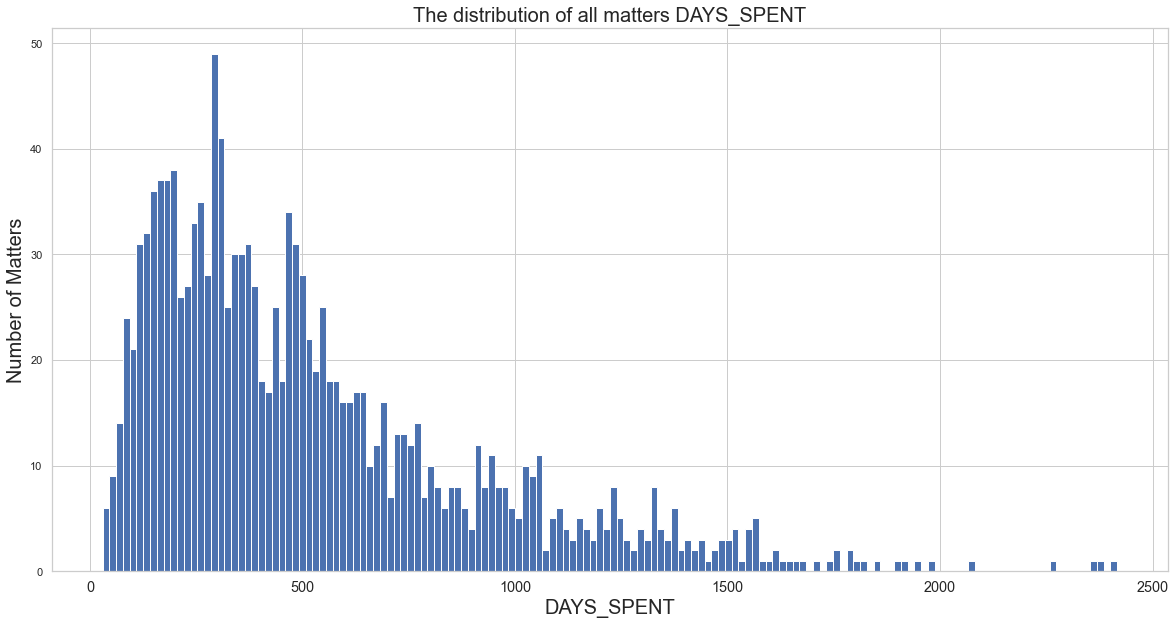

In [152]:
# Check the distribution of all matters
plt.figure(figsize=(9, 3))
sns.set(style="whitegrid")
x = df_main['DAYS_SPENT'].hist(bins=150, figsize=(20,10), xlabelsize = 'large')
x.set_title('The distribution of all matters DAYS_SPENT', size=20)
x.set_ylabel('Number of Matters', size=20)
x.set_xlabel('DAYS_SPENT', size=20)

*From above we can find that the distribution of matters are right-skewed, with majority of matters below 500 days.*

<Figure size 648x216 with 0 Axes>

Text(0.5, 1.0, 'The distribution of DAYS_SPENT below 500')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'DAYS_SPENT')

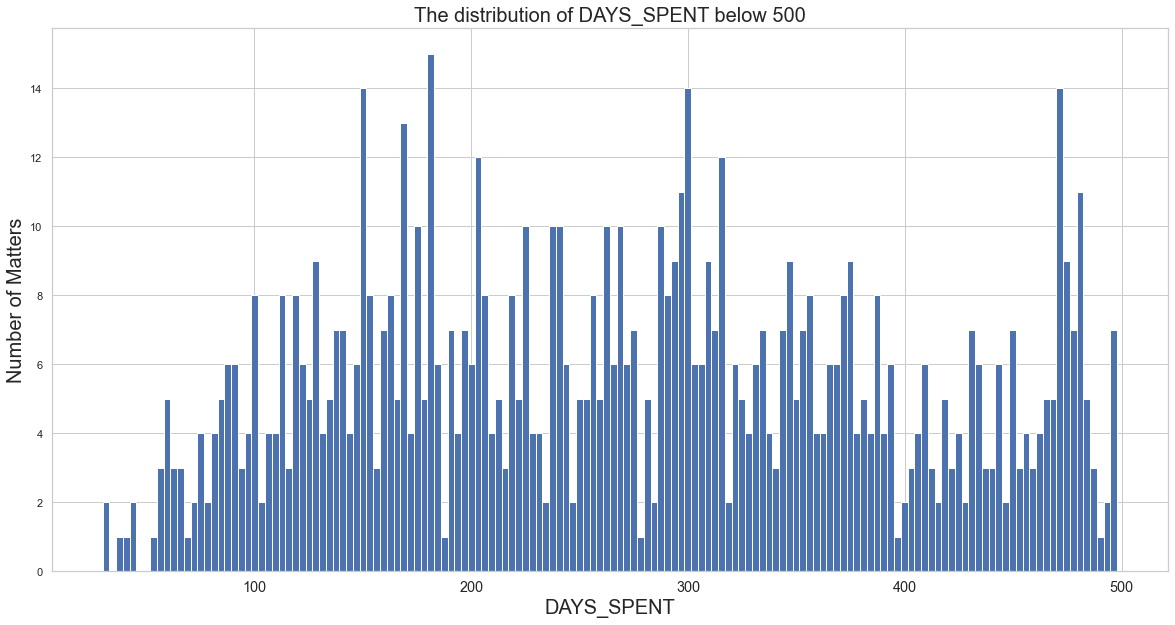

In [153]:
# Create a datatable with matters only below 500 days
df_500 = df_main[df_main['DAYS_SPENT']<500]
# Check matters below 500 days distribution
plt.figure(figsize=(9, 3))
sns.set(style="whitegrid")
x = df_500['DAYS_SPENT'].hist(bins=150, figsize=(20,10), xlabelsize = 'large')
x.set_title('The distribution of DAYS_SPENT below 500', size=20)
x.set_ylabel('Number of Matters', size=20)
x.set_xlabel('DAYS_SPENT', size=20)

<Figure size 648x216 with 0 Axes>

Text(0.5, 1.0, 'The distribution of DAYS_SPENT below 150')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'DAYS_SPENT')

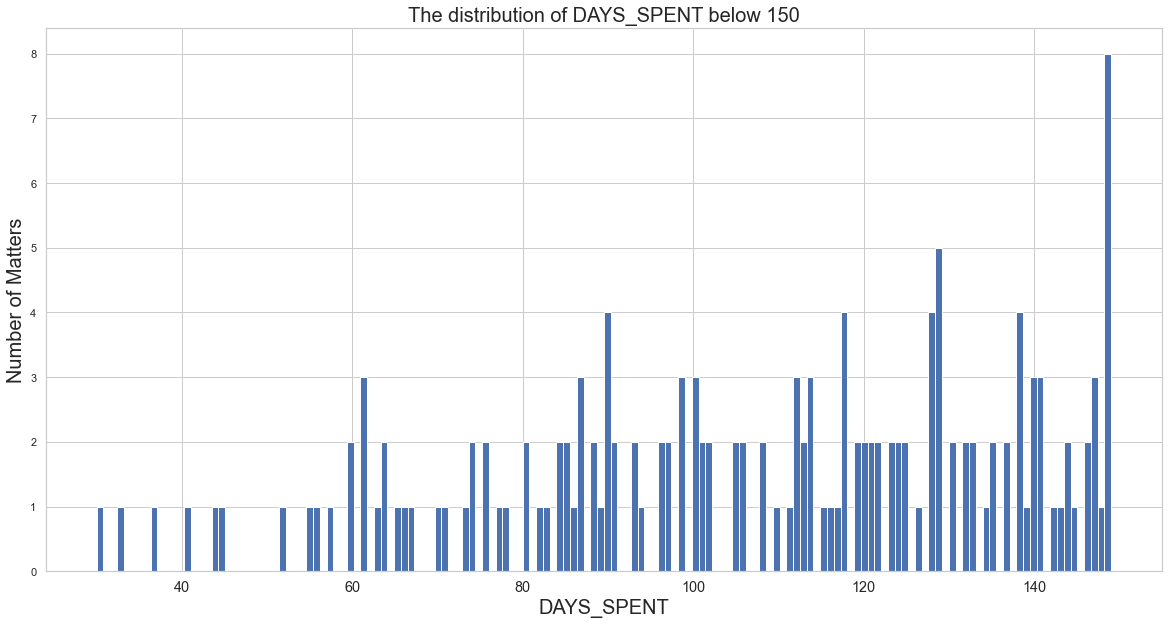

In [154]:
# Create a datatable with matters only below 100 days
df_150 = df_main[df_main['DAYS_SPENT']<150]
# Check matters below 100 days distribution
plt.figure(figsize=(9, 3))
sns.set(style="whitegrid")
x = df_150['DAYS_SPENT'].hist(bins=150, figsize=(20,10), xlabelsize = 'large')
x.set_title('The distribution of DAYS_SPENT below 150', size=20)
x.set_ylabel('Number of Matters', size=20)
x.set_xlabel('DAYS_SPENT', size=20)

*From above, we can find that the number of matters starts increase around 150 days, therefore, we only save all the matters that last more than 150 days.*

**Setting time periods TP**

In [155]:
# Setting TP as time periods to control the time length
TP = 150
#Check how many matters below certain days
len(df['MATTER_UNO'][df['DAYS_SPENT'] <= TP].unique())

224

*From above we can find that 224 matters are below 150 days, which would be dropped.

*From above we can find that 25 matters are below 60 days, which would be dropped.

*From above we can find that 25 matters are below 30 days, which would be dropped.

In [156]:
# Save all matters more than TP days as we would need time length periods more than TP days
df_main = df_main[df_main['DAYS_SPENT'] >= TP]

**6.1.2 Entry time features**

*Build a time feature that could indicate days from START_DATE, and only save all the entries within time periods.*

In [157]:
# Create DAYS_TO_START feature to indicate days from START_DATE.
df['DAYS_TO_START'] = pd.to_datetime(df['TRAN_DATE']) - pd.to_datetime(df['START_DATE'])

In [158]:
# Convert days to numerical number.
df['DAYS_TO_START'] = df['DAYS_TO_START'].astype('timedelta64[D]')

In [159]:
# Drop all the othe DATE related columns as they will not be put into model
df.drop(columns = ['TRAN_DATE', 'POST_DATE', 'OPEN_DATE', 'CLOSE_DATE', 'START_DATE'], inplace = True)

In [160]:
# Save all the entries within time periods from the start of the matter TP
df = df[df['DAYS_TO_START'] <= TP]

<br>

**6.2 Building features**

**Business Hypothesis Before:**

|**Hypothesis**   |  **Data From**  |**Feature Names**|
|:---| :---|:---|
| **`The times individual clients have worked with, higher value range it is`** | Indicate by the number after dot in CLNT_MATT_CODE|PAST_ENGAGEMENT|
| **`The times of entries of each matter in TP days, higher value range`** | Count the entries of each matter	|NOW_ENGAGEMENT|
| **`As Times of preparation increases in TP days, value range increases`** | Count the pre-action phases of each matter|PRE_TIMES|
| **`As total cost increases in TP days, value range increases`** | Sum up the total cost of pre-action phases of each matter|PRE_COST|
| **`More Senior positons for the matter partner in TP days, higher value range`** | Get values from BILL_EMPL_UNO| POSITION_PARTNER|
| **`More senior and more staff for the matter in TP days, higher value range`** | Sum up the numerical number of staff for the matter| NUM_PPL|
| **`Corporate matter time is generally in higher value range than private ones`** | One hot encoding the MATT_DEPT_NAME|MATT_DEPT_NAME|
| **`Different Phase would result in various costs`** | One hot encoding the PHASE_DESC|PHASE_DESC|

In [161]:
# Create PAST_ENGAGEMENT columns
df['PAST_ENGAGEMENT'] = df['CLNT_MATT_CODE'].astype(str).str[-1].astype(int)
df_past = df[['MATTER_UNO', 'PAST_ENGAGEMENT']].groupby('MATTER_UNO').mean()

# Merge PAST_ENGAGEMENT columns to main table
df_main = df_main.merge(df_past, on='MATTER_UNO', how = 'left')

In [162]:
# Create NOW_ENGAGEMENT columns within time periods
df_now = pd.DataFrame(df[['MATTER_UNO','TIME_UNO']].groupby('MATTER_UNO').size()).rename(columns={0:'NOW_ENGAGEMENT'})

# Merge NOW_ENGAGEMENT columns to main table
df_main = df_main.merge(df_now, on='MATTER_UNO', how = 'left')

In [163]:
# Create PRE_TIMES columns within time periods
df['PHASE_DESC'] = df['PHASE_DESC'].str.upper()
df_PT = pd.DataFrame(df[df['PHASE_DESC'].str.contains('PRE-ACTION')].groupby('MATTER_UNO')
                     .size()).rename(columns = {0:'PRE_TIMES'})

# Merge PRE_TIMES columns to main table
df_main = df_main.merge(df_PT, on='MATTER_UNO', how = 'left')

In [164]:
# Fill NULL values with mean in PRE_TIMES columns
df_main['PRE_TIMES'].fillna(0, inplace=True)

In [165]:
# Check unusual PRE_TIMES values, it looks it indeed conducted a lot of entries within time periods.
df[df['MATTER_UNO']==149727]

,MATTER_UNO,TIME_UNO,BASE_HRS,BILLED_HRS,BASE_AMT,BILLED_AMT,CLNT_MATT_CODE,BILL_EMPL_UNO,PHTASK_CODE,PHASE_DESC,TASK_DESC,EMPL_UNO,POSITION,INACTIVE,MATT_TYPE_DESC,MATT_TYPE_CODE,EMPL_DEPT_NAME,MATT_DEPT_NAME,ACTION_CODE,ACTION_DESC,DAYS_SPENT,DAYS_TO_START,PAST_ENGAGEMENT
444059,149727,10666879,2.80,2.80,868.00,584.10,63923.1,2607,J01.12,J01 - PRE-ACTION,12: Legal Investigation,3192,Associate,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,J09,Plan/Prepare/Draft/Review,134.0,1.0,1
444072,149727,10668853,0.10,0.10,39.50,29.27,63923.1,2607,J01.12,J01 - PRE-ACTION,12: Legal Investigation,1732,Legal Director,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,J06,Internal Communications,134.0,2.0,1
444073,149727,10668854,0.10,0.10,39.50,29.27,63923.1,2607,J01.11,J01 - PRE-ACTION,11: Factual Investigation,1732,Legal Director,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,J07,Other External Communications,134.0,2.0,1
444074,149727,10668855,0.40,0.40,158.00,117.09,63923.1,2607,J01.12,J01 - PRE-ACTION,12: Legal Investigation,1732,Legal Director,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,J06,Internal Communications,134.0,2.0,1
444081,149727,10669516,1.70,1.70,977.50,657.79,63923.1,2607,J18.181,J18 - OUTSIDE LITIGATION PROCEDURE,181. Outside Litigation Procedural Stages,3620,Partner,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Dispute Resolution,Private,J09,Plan/Prepare/Draft/Review,134.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444579,149727,10972327,1.70,1.70,671.50,497.63,63923.1,2607,J04.44,J04 - BUDGETING/COSTS ESTIMATE,44. Monitoring Costs Budget,1732,Legal Director,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,J09,Plan/Prepare/Draft/Review,134.0,92.0,1
444580,149727,10972329,0.20,0.20,79.00,58.54,63923.1,2607,J04.44,J04 - BUDGETING/COSTS ESTIMATE,44. Monitoring Costs Budget,1732,Legal Director,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,J06,Internal Communications,134.0,92.0,1
444581,149727,10972405,0.80,0.80,316.00,234.55,63923.1,2607,J16.161,J16 - OUT OF CLIENT SCOPE,161: Outside Scope Agreed With Client,1732,Legal Director,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Private,Private,J06,Internal Communications,134.0,92.0,1
444584,149727,10975880,0.89,0.89,512.58,344.93,63923.1,2607,J01.11,J01 - PRE-ACTION,11: Factual Investigation,3620,Partner,Y,Litigation/arbitration/ADR - Private Client - ...,J2319,Dispute Resolution,Private,WOR,Working,134.0,0.0,1


In [166]:
# Create PRE_COST columns
df_bill = df[['MATTER_UNO', 'TIME_UNO', 'BILLED_AMT']]
# Sum up all the BILLED_AMT wihtin time periods
df_bill = df_bill[['MATTER_UNO','BILLED_AMT']].groupby('MATTER_UNO').sum().rename(columns={'BILLED_AMT': 'PRE_COST'})
# Merge the PRE_COST to main table
df_main = df_main.merge(df_bill, on = 'MATTER_UNO', how = 'left')

In [167]:
# Create NUM_PPL
df_num = pd.DataFrame(df[['MATTER_UNO','EMPL_UNO']].groupby('MATTER_UNO')['EMPL_UNO'].nunique())
df_num.rename(columns={'EMPL_UNO' : 'NUM_PPL'}, inplace = True)

# Merge to main table
df_main = df_main.merge(df_num, on='MATTER_UNO', how ='left')

In [168]:
# Merge MATT_DEPT_NAME to main table
df_dept = df[['MATTER_UNO', 'MATT_DEPT_NAME']]
# Drop dupliactes
df_dept.drop_duplicates(subset=None, keep='first', inplace=True)
# Merge into the main table
df_main = df_main.merge(df_dept, on = 'MATTER_UNO', how = 'left')

<ipython-input-168-e90ac402a273>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dept.drop_duplicates(subset=None, keep='first', inplace=True)


In [169]:
# One hot encoding MATT_DEPT_NAME column
lb = LabelBinarizer()
# Join the encoded df
df_main = df_main.join(pd.DataFrame(lb.fit_transform(df_main['MATT_DEPT_NAME']),
                          columns=lb.classes_, 
                          index=df_main.index))

In [170]:
# Drop one MATT_DEPT_NAME Column
df_main.drop(columns = 'MATT_DEPT_NAME', inplace = True)
df_main

,MATTER_UNO,TOTAL_AMT,VALUE_RANGE,DAYS_SPENT,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support
0,97620,197037.00,3,2417.0,1,18,17.0,0.00,1,0,0,0,1,0,0
1,94332,1500.00,0,263.0,3,9,0.0,1500.00,5,1,0,0,0,0,0
2,95389,6716.67,1,895.0,3,34,31.0,1500.00,3,0,0,0,1,0,0
3,95603,11192.00,1,1100.0,3,21,21.0,11192.00,4,0,0,0,1,0,0
4,95605,5620.00,1,296.0,3,74,74.0,4498.00,5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,148372,3000.00,0,207.0,1,19,17.0,3000.00,3,0,0,0,1,0,0
1235,132125,1899.75,0,168.0,1,21,0.0,1899.75,5,0,1,0,0,0,0
1236,148351,6190.00,1,206.0,1,4,4.0,6190.00,1,0,1,0,0,0,0
1237,148773,2500.00,0,158.0,1,8,8.0,2500.00,2,0,1,0,0,0,0


In [171]:
# Check numbers of matters to different department 
df_main['Dispute Resolution'].sum()
df_main['Private'].sum()
df_main['Real Estate'].sum()
df_main['Support'].sum()
df_main['Employment'].sum()

893

304

12

9

4

In [172]:
# Check Employment, Real Estate, Support departments
df_main[df_main['Employment']==1]
df_main[df_main['Real Estate']==1]
df_main[df_main['Support']==1]

,MATTER_UNO,TOTAL_AMT,VALUE_RANGE,DAYS_SPENT,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support
226,105856,63604.5,3,771.0,3,147,123.0,24794.00,8,0,0,1,0,0,0
503,121367,41407.4,2,719.0,1,65,48.0,22199.68,5,0,0,1,0,0,0
509,122057,51592.5,3,827.0,3,1,1.0,1153.08,1,0,0,1,0,0,0
690,124683,31938.5,2,485.0,5,52,16.0,31938.50,10,0,0,1,0,0,0


,MATTER_UNO,TOTAL_AMT,VALUE_RANGE,DAYS_SPENT,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support
95,100340,403348.00,3,740.0,1,274,35.0,118548.00,11,0,0,0,0,1,0
112,101602,4782.50,1,1302.0,1,10,7.0,0.00,3,0,0,0,0,1,0
126,101867,8500.00,1,471.0,4,24,24.0,8500.00,4,0,0,0,0,1,0
128,101921,9727.50,1,569.0,3,37,7.0,2193.35,2,0,0,0,0,1,0
134,102148,20085.00,2,631.0,1,114,25.0,19335.00,3,0,0,0,0,1,0
153,102977,26751.03,2,1008.0,1,46,40.0,21313.22,6,0,0,0,0,1,0
210,105208,5000.00,1,191.0,1,13,10.0,5000.00,1,0,0,0,0,1,0
219,105405,15307.50,2,784.0,1,73,29.0,11095.00,5,0,0,0,0,1,0
223,105632,3500.00,0,478.0,3,2,2.0,150.12,1,0,0,0,0,1,0
291,108830,3460.50,0,617.0,3,20,1.0,2864.50,5,0,0,0,0,1,0


,MATTER_UNO,TOTAL_AMT,VALUE_RANGE,DAYS_SPENT,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support
613,122158,990368.67,3,1290.0,1,2373,0.0,217464.73,19,0,0,0,0,0,1
658,123639,60017.00,3,1174.0,1,82,82.0,13274.72,4,0,0,0,0,0,1
742,127479,32094.50,2,1019.0,1,73,67.0,27030.50,5,0,0,0,0,0,1
878,132056,14300.00,2,742.0,7,14,8.0,14300.00,4,0,0,0,0,0,1
1033,137653,16878.50,2,628.0,1,42,37.0,16878.50,6,0,0,0,0,0,1
1075,139273,10263.50,1,525.0,1,84,51.0,8071.50,4,0,0,0,0,0,1
1100,139986,99100.00,3,490.0,1,176,140.0,29405.95,6,0,0,0,0,0,1
1170,143977,7000.00,1,334.0,1,35,32.0,7000.00,3,0,0,0,0,0,1
1195,145099,12961.00,2,300.0,1,45,38.0,12961.00,4,0,0,0,0,0,1


*From above we find that many matters are total_amt is zero.*

**PRE-COST Analysis**

In [173]:
# Check how many rows are 0s.
df_main[df_main['PRE_COST']==0]

,MATTER_UNO,TOTAL_AMT,VALUE_RANGE,DAYS_SPENT,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support
0,97620,197037.00,3,2417.0,1,18,17.0,0.0,1,0,0,0,1,0,0
106,101023,9500.00,1,1799.0,1,3,3.0,0.0,2,0,0,0,1,0,0
112,101602,4782.50,1,1302.0,1,10,7.0,0.0,3,0,0,0,0,1,0
677,127653,2083.33,0,482.0,1,4,4.0,0.0,1,0,1,0,0,0,0
795,132996,10608.00,1,625.0,3,2,2.0,0.0,1,0,1,0,0,0,0
1088,147558,5881.00,1,540.0,1,1,1.0,0.0,1,0,1,0,0,0,0


<Figure size 648x216 with 0 Axes>

Text(0.5, 1.0, 'The distribution of PRE_COST in main table')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'Total Amount of Bill (Unit 10**6 pounds)')

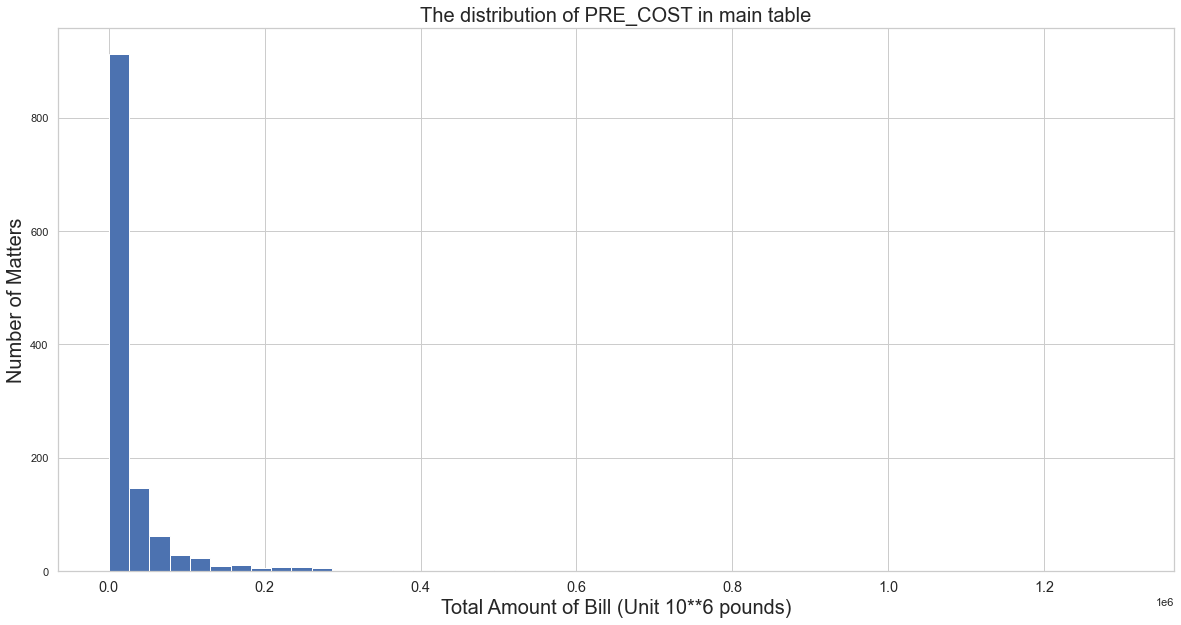

In [174]:
#Check the total cost distribution
plt.figure(figsize=(9, 3))
sns.set(style="whitegrid")
x = df_main['PRE_COST'].hist(bins=50, figsize=(20,10), xlabelsize = 'large')
x.set_title('The distribution of PRE_COST in main table', size=20)
x.set_ylabel('Number of Matters', size=20)
x.set_xlabel('Total Amount of Bill (Unit 10**6 pounds)', size=20)

In [86]:
# Dive into deeper analysis in range from 0 - 50,000 pounds distribution
df_small = df_main[df_main['PRE_COST']<50000]
len(df_small)

1056

*From above we can find that there are 1340 matters out of 1631 in range 0 - 50,000 pounds.*

<Figure size 648x216 with 0 Axes>

Text(0.5, 1.0, 'The distribution of PRE_COST under 200,000 pounds')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'Total Amount of Cost')

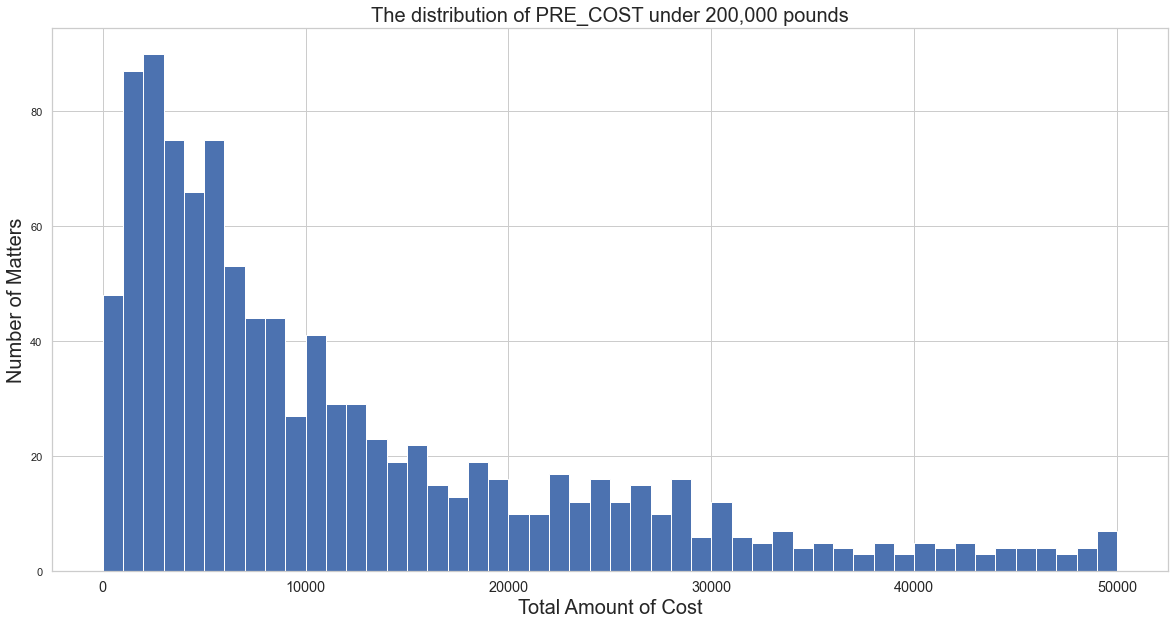

In [87]:
# Check the total cost distribution in range from 0 - 50,000 pounds
plt.figure(figsize=(9, 3))
sns.set(style="whitegrid")
x = df_small['PRE_COST'].hist(bins=50, figsize=(20,10), xlabelsize = 'large')
x.set_title('The distribution of PRE_COST under 200,000 pounds', size=20)
x.set_ylabel('Number of Matters', size=20)
x.set_xlabel('Total Amount of Cost', size=20)

In [88]:
# Dive into deeper analysis in range from 0 - 20,000 pounds distribution
df_smaller = df_main[df_main['PRE_COST']<20000]
len(df_smaller)

837

*From above we can find that there are 837 matters out of 1579 in range 0 - 20,000 pounds.*

<Figure size 648x216 with 0 Axes>

Text(0.5, 1.0, 'The distribution of PRE_COST under 200,000 pounds')

Text(0, 0.5, 'Number of Matters')

Text(0.5, 0, 'Total Amount of Cost')

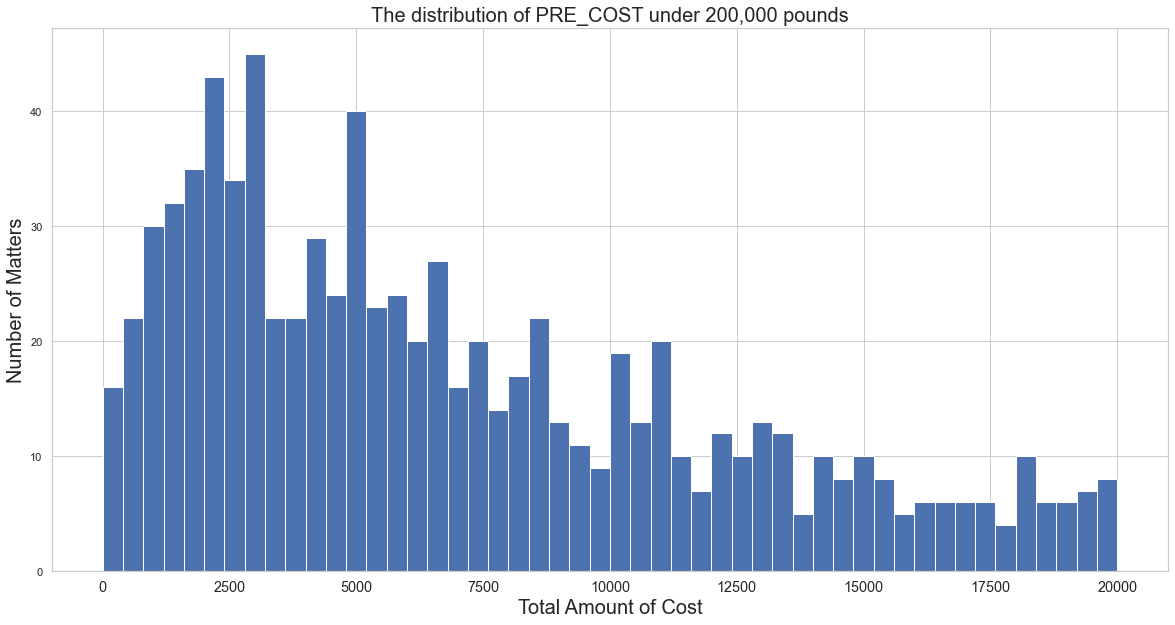

In [89]:
# Check the total cost distribution in range from 0 - 20,000 pounds
plt.figure(figsize=(9, 3))
sns.set(style="whitegrid")
x = df_smaller['PRE_COST'].hist(bins=50, figsize=(20,10), xlabelsize = 'large')
x.set_title('The distribution of PRE_COST under 200,000 pounds', size=20)
x.set_ylabel('Number of Matters', size=20)
x.set_xlabel('Total Amount of Cost', size=20)

*From above Three histograms, we can find that the PRE_COST of matters are right skewed.*

In [90]:
# Double check the days in within TP days
df['DAYS_TO_START'].max()

150.0

In [91]:
# Create features about all the different positions responsible for the matter within time periods. TP
df_po = pd.DataFrame(df[['MATTER_UNO','EMPL_UNO']].groupby('MATTER_UNO')['EMPL_UNO'].unique()).reset_index()
df_po.head(5)

,MATTER_UNO,EMPL_UNO
0,94332,"[1677, 1007, 1038, 1865, 2246]"
1,95389,"[1860, 1109, 2206]"
2,95472,"[1539, 2228]"
3,95543,"[1554, 1120]"
4,95603,"[1878, 2301, 2029, 1060]"


In [93]:
#Creating vector of different positions for each matter
df_test = pd.DataFrame(df_po.EMPL_UNO.tolist(), index = df_po.MATTER_UNO)
df_test.reset_index(inplace=True)
df_test = df_test.fillna(0).applymap(int).applymap(str)
df_test

,MATTER_UNO,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,94332,1677,1007,1038,1865,2246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,95389,1860,1109,2206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,95472,1539,2228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,95543,1554,1120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,95603,1878,2301,2029,1060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,149129,4155,1109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1627,149147,3589,1786,3513,2152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1628,149169,4082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1629,149213,3997,2948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
# Check the maximum column to verify the authenticity
df_po.EMPL_UNO.str.len().sort_values()

808      1
932      1
710      1
1371     1
143      1
        ..
1349    24
117     24
1393    25
311     25
394     26
Name: EMPL_UNO, Length: 1631, dtype: int64

In [95]:
# Check the index 33 to verify the authenticity
df_po[df_po.index == 394]
df_main[df_main['MATTER_UNO'] == 109276]

,MATTER_UNO,EMPL_UNO
394,109276,"[1030, 1260, 2774, 1864, 2733, 1109, 1111, 282..."


,MATTER_UNO,TOTAL_AMT,VALUE_RANGE,DAYS_SPENT,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support
293,109276,1256765.0,3,1036.0,1,1275,68.0,1240801.02,26,0,1,0,0,0,0


In [96]:
# Convert unique EMPL_UNO of each matter to positons.
df_test.replace({0: df_pos, 1: df_pos, 2: df_pos, 3: df_pos, 4: df_pos, 5: df_pos, 6: df_pos, 7: df_pos,
                 8: df_pos, 9: df_pos, 10: df_pos, 11: df_pos, 12: df_pos, 13: df_pos, 14: df_pos, 15: df_pos,
                 16: df_pos, 17: df_pos, 18: df_pos, 19: df_pos, 20: df_pos, 21: df_pos, 22: df_pos, 23: df_pos,
                 24: df_pos,  25: df_pos}
               , inplace = True)
df_test

,MATTER_UNO,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,94332,"Legal Director, PSL",Senior Equity Partner,Senior Equity Partner,Managing Associate,Paralegal\PA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,95389,Associate,Legal Director,Costs Lawyer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,95472,Equity Partner,Associate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,95543,Associate,Equity Partner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,95603,Managing Associate,Associate,Paralegal,Deputy Chairman,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,149129,Equity Partner,Legal Director,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1627,149147,Associate,Senior Equity Partner,Paralegal,Equity Partner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1628,149169,Associate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1629,149213,Managing Associate,Equity Partner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
# Creating position categories according to the meeting with supervisor
Others = [ 'PSL', 'Costs',   'Compliance', 'Others (not billing)', 'Outdoor clerk', 'Consultant', 'Knowledge Services', 'EA & Projects Advisor', 'Secondee', 'Knowledge Analyst', 'eDisclosure', 'nan',  'Cyber', 'Senior Knowledge Analyst',   'Business Development Manager','Business Insight Manager',   'Senior Data Protection Specialist',  'Costs Lawyer',  'Consultant', 'Sports Lawyer',  'Knowledge Manager', 'Trainee Solicitor 2nd year', 'Trainee Solicitor (2nd yr)',  'Legal Executive', 'Knowledge Solutions Analyst', 'Project Manager', 'Legal Administrator',  'File Closing Support', 'Professional Support Lawyer', 'E-Disclosure Project Manager', 'Barrister', 'eDisclosure Project Manager',  'Cyber Inteligence Analyst',  'Cyber Intelligence Analyst', 'Cyber Innovation Architect',  'Cyber Manager',  'Trainee 2nd year', 'Cyber Developer', 'Junior Solutions Engineer', 'Intern', 'Temp', 'Senior Risk & Compliance Manager']
Trainee = ['Trainee 2nd Year', 'Trainee 1st Year', 'Junior Solutions Engineer', 'Intern',  'Trainee Solicitor (2nd Year)',  'Trainee (Secondment)', 'Trainee']
ParalegalPPA = ['PPA', 'Paralegal', 'Trade Mark Paralegal', 'Paralegal\\PA', 'Legal Assistant',  'Assistant Solicitor', 'Paralegal PA', 'Personal Assistant', 'Legal assistant', 'Paralegal/Personal Assistant',  'PA', 'Trade Mark Attorney',  'Litigation Recoveries Assistant']
Associate = ['Indian Qualified Associate',  'Associate',  'In house compliance associate', 'Senior Associate',  'Associate (also BVI qualified)', 'Associate (Member of the New York Bar)', 'Associate (Barrister)', 'Associate, Chartered Trade Mark Attorney', 'Indian Qualified Associate']
ManagingAssociate = ['Managing Associate, PSL', 'Managing Associate', 'Managing Associate (also BVI qualified)', 'Professional Support Lawyer - Managing Associate', 'Managing Associate, Professional Support Lawyer', 'Managing Associate (Russian qualified lawyer)', 'Managing Associate (Admitted at the Austrian Bar)']
LegalDirector = ['Legal Director, PSL', 'Legal Director', 'Legal Director (Barrister)',   'Head of e Discovery',  'Head of Employment Policy & Engagement', 'Head of Legal Operations', 'China Desk Lead',  'Managing Associate (Russian qualified lawyer)',  'Professional Support Lawyer - Legal Director', 'Head of Legal Operations', 'Cyber Consulting Director', 'Cyber Intelligence Director', 'Head of Employment Policy & Engagement']
Partner = ['Partner', 'Senior Equity Partner', 'Equity Partner', 'Partner (Junior)', 'General Counsel, Partner and COLP', 'Deputy Chairman', 'Senoir Equity Partner']

In [98]:
# Replace all the positions with dictionary above
df_test.replace(dict.fromkeys(Others, 'Others'), inplace = True)
df_test.replace(dict.fromkeys(Trainee, 'Trainee'), inplace = True)
df_test.replace(dict.fromkeys(ParalegalPPA, 'ParalegalPPA'), inplace = True)
df_test.replace(dict.fromkeys(Associate, 'Associate'), inplace = True)
df_test.replace(dict.fromkeys(ManagingAssociate, 'ManagingAssociate'), inplace = True)
df_test.replace(dict.fromkeys(LegalDirector, 'LegalDirector'), inplace = True)
df_test.replace(dict.fromkeys(Partner, 'Partner'), inplace = True)

In [99]:
# Build up table to calculate all the positions in each matter
df_pnum = df_test.apply(pd.Series.value_counts, axis=1)[['Others', 'Trainee', 'ParalegalPPA', 
                                               'Associate','ManagingAssociate', 'LegalDirector', 'Partner']].fillna(0)
df_pnum

,Others,Trainee,ParalegalPPA,Associate,ManagingAssociate,LegalDirector,Partner
0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
1626,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1627,0.0,0.0,1.0,1.0,0.0,0.0,2.0
1628,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1629,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [100]:
# Check how many columns to drop
df_test.join(df_pnum)

,MATTER_UNO,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Others,Trainee,ParalegalPPA,Associate,ManagingAssociate,LegalDirector,Partner
0,94332,LegalDirector,Partner,Partner,ManagingAssociate,ParalegalPPA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
1,95389,Associate,LegalDirector,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,95472,Partner,Associate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,95543,Associate,Partner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,95603,ManagingAssociate,Associate,ParalegalPPA,Partner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,149129,Partner,LegalDirector,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1627,149147,Associate,Partner,ParalegalPPA,Partner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
1628,149169,Associate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1629,149213,ManagingAssociate,Partner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [101]:
# Join the table above to get the positions for each matter
# Note that the number to drop may be different, at most 25 for 150days, and 23 for 80 and 60days.  In 45days it's only 21, and in 30days it's 20  
df_po_num = df_test.join(df_pnum).drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], axis='columns')
df_po_num = df_po_num.applymap(int)
df_po_num

,MATTER_UNO,Others,Trainee,ParalegalPPA,Associate,ManagingAssociate,LegalDirector,Partner
0,94332,0,0,1,0,1,1,2
1,95389,1,0,0,1,0,1,0
2,95472,0,0,0,1,0,0,1
3,95543,0,0,0,1,0,0,1
4,95603,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...
1626,149129,0,0,0,0,0,1,1
1627,149147,0,0,1,1,0,0,2
1628,149169,0,0,0,1,0,0,0
1629,149213,0,0,0,0,1,0,1


In [102]:
# Merge back to the main table
df_main = df_main.merge(df_po_num, on = 'MATTER_UNO', how = 'left')
df_main

,MATTER_UNO,TOTAL_AMT,VALUE_RANGE,DAYS_SPENT,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support,Others,Trainee,ParalegalPPA,Associate,ManagingAssociate,LegalDirector,Partner
0,97620,197037.00,3,2417.0,1,18,17.0,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,94332,1500.00,0,263.0,3,9,0.0,1500.00,5,1,0,0,0,0,0,0,0,1,0,1,1,2
2,95389,6716.67,1,895.0,3,34,31.0,1500.00,3,0,0,0,1,0,0,1,0,0,1,0,1,0
3,95603,11192.00,1,1100.0,3,21,21.0,11192.00,4,0,0,0,1,0,0,0,0,1,1,1,0,1
4,95605,5620.00,1,296.0,3,74,74.0,4498.00,5,0,0,0,1,0,0,0,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,148372,3000.00,0,207.0,1,19,17.0,3000.00,3,0,0,0,1,0,0,0,1,0,1,0,0,1
1235,132125,1899.75,0,168.0,1,21,0.0,1899.75,5,0,1,0,0,0,0,0,1,0,2,1,0,1
1236,148351,6190.00,1,206.0,1,4,4.0,6190.00,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1237,148773,2500.00,0,158.0,1,8,8.0,2500.00,2,0,1,0,0,0,0,0,0,0,0,1,0,1


**Correlation heatmap**

<Figure size 1440x576 with 0 Axes>

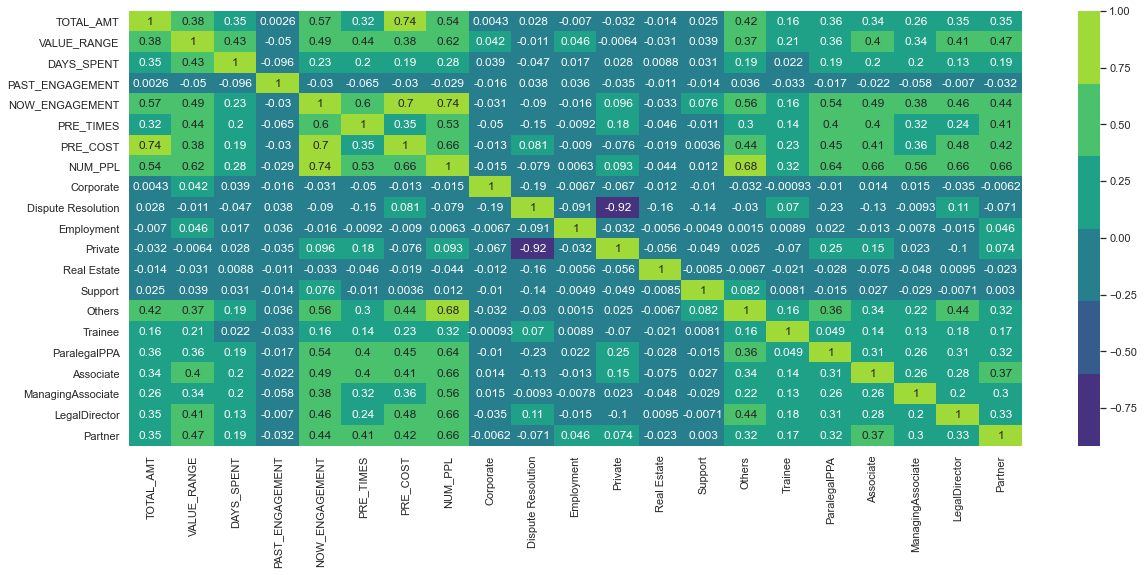

In [103]:
# Build heatmap correlation map
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
corr = df_main.drop('MATTER_UNO', axis=1).corr()
cmap=sns.color_palette("viridis")
sns.heatmap(corr,annot=True, cmap=cmap, xticklabels=True, yticklabels=True)

*From above we can find the relationship to value_range or total amount of money.*

# 7. Modeling

In [107]:
# Check main data table
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1238
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MATTER_UNO          1239 non-null   int64  
 1   TOTAL_AMT           1239 non-null   float64
 2   VALUE_RANGE         1239 non-null   int64  
 3   DAYS_SPENT          1239 non-null   float64
 4   PAST_ENGAGEMENT     1239 non-null   int32  
 5   NOW_ENGAGEMENT      1239 non-null   int64  
 6   PRE_TIMES           1239 non-null   float64
 7   PRE_COST            1239 non-null   float64
 8   NUM_PPL             1239 non-null   int64  
 9   Corporate           1239 non-null   int32  
 10  Dispute Resolution  1239 non-null   int32  
 11  Employment          1239 non-null   int32  
 12  Private             1239 non-null   int32  
 13  Real Estate         1239 non-null   int32  
 14  Support             1239 non-null   int32  
 15  Others              1239 non-null   int64  
 16  Traine

In [108]:
# Main table for regression as we would need total amount as target.
df_main_reg = df_main.drop(['MATTER_UNO','VALUE_RANGE','DAYS_SPENT'], axis=1)

**7.1 Benchmark model - Linear regression**

In [109]:
# Check Null values in main table 
df_main_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1238
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TOTAL_AMT           1239 non-null   float64
 1   PAST_ENGAGEMENT     1239 non-null   int32  
 2   NOW_ENGAGEMENT      1239 non-null   int64  
 3   PRE_TIMES           1239 non-null   float64
 4   PRE_COST            1239 non-null   float64
 5   NUM_PPL             1239 non-null   int64  
 6   Corporate           1239 non-null   int32  
 7   Dispute Resolution  1239 non-null   int32  
 8   Employment          1239 non-null   int32  
 9   Private             1239 non-null   int32  
 10  Real Estate         1239 non-null   int32  
 11  Support             1239 non-null   int32  
 12  Others              1239 non-null   int64  
 13  Trainee             1239 non-null   int64  
 14  ParalegalPPA        1239 non-null   int64  
 15  Associate           1239 non-null   int64  
 16  Managi

In [110]:
# Creat arrays for the features and the response variable
y = df_main_reg['TOTAL_AMT'].values
X = df_main_reg.drop('TOTAL_AMT', axis = 1).values

In [111]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Create the regressor: reg_all
reg = LinearRegression()
# Fit the regressor to the training data
reg.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

LinearRegression()

In [112]:
# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 106398.91616092589


In [113]:
# Compute and print R^2 and RMSE
mape = mean_absolute_error(y_test, y_pred)
print(mape)

51212.01237726736


Root Mean Squared Error for **150 days**: 106398, with mean_absolute error of 51,212%

Root Mean Squared Error for **80 days**: 113996.

Root Mean Squared Error for **60 days**: 149048. 

Root Mean Squared Error for **40 days**: 139933. 

Root Mean Squared Error for **30 days**: 198019. 

In [114]:
#Using Cross_validation in scikit-learn
cv_results = cross_val_score(reg, X, y, cv =5)
print(cv_results)
print("Accuracy of Model with Cross Validation is:",np.mean(cv_results) * 100)

[0.47624119 0.4030601  0.59314153 0.4123325  0.46634759]
Accuracy of Model with Cross Validation is: 47.02245814088218


*From above we could find poor quality to predict the value range using benchmark model*

For **150 days**, only achieved 47.02% accuracy.

For **80 days**, only achieved 34.97% accuracy.

For **60 days**, only achieved 29.90% accuracy.

For **45 days**, only achieved 26.59% accuracy.

For **30 days**, only achieved 12.40% accuracy.

**7.1.1 Lasso regression**

Lasso(alpha=0.4, normalize=True)

[ 2.93221070e+03  1.69304383e+01  1.33711132e+02  1.61337481e+00
 -6.54114056e+01  3.58102240e+04 -1.28423544e+03 -9.09029782e+03
  0.00000000e+00  5.56834704e+03  2.85352436e+04  2.82474821e+04
 -8.22661678e+03 -2.72179048e+03  2.04175144e+03 -5.95824572e+03
 -9.88447816e+03  4.68811331e+03]


([<matplotlib.axis.XTick at 0x1abeecbda90>,
 [Text(0, 0, 'TOTAL_AMT'),
  Text(0, 0, 'PAST_ENGAGEMENT'),
  Text(0, 0, 'NOW_ENGAGEMENT'),
  Text(0, 0, 'PRE_TIMES'),
  Text(0, 0, 'PRE_COST'),
  Text(0, 0, 'NUM_PPL'),
  Text(0, 0, 'Corporate'),
  Text(0, 0, 'Dispute Resolution'),
  Text(0, 0, 'Employment'),
  Text(0, 0, 'Private'),
  Text(0, 0, 'Real Estate'),
  Text(0, 0, 'Support'),
  Text(0, 0, 'Others'),
  Text(0, 0, 'Trainee'),
  Text(0, 0, 'ParalegalPPA'),
  Text(0, 0, 'Associate'),
  Text(0, 0, 'ManagingAssociate'),
  Text(0, 0, 'LegalDirector')])

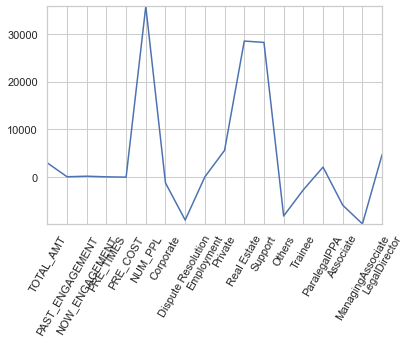

In [115]:
lasso = Lasso(alpha=0.4, normalize= True)
# Fit the regressor to the data
lasso.fit(X,y)
# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
# Plot the coefficients
plt.plot(range(18), lasso_coef)
plt.xticks(range(18), df_main_reg.columns.values, rotation=60)
plt.margins(0)
plt.show(figure)

we will find that the most important features are PRE_COST, DEPT_NAMES and number of different positions.

**7.1.2 Ridge regression**

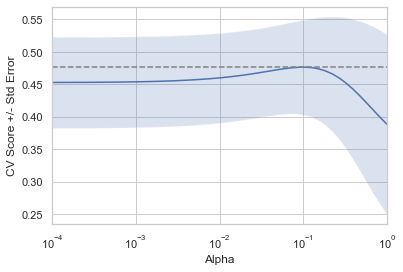

In [116]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

From above we can find that for 150 days, the accuracy of 45% would be achieved when hyperparameter of ridge regression is at 10e-1. However, the accuracy is still very low.

**7.2 classification algorithm**

In [117]:
# Main table for classification as we would need VALUE_RANGE as target.
df_main_cla = df_main.drop(['MATTER_UNO','TOTAL_AMT','DAYS_SPENT'], axis=1)
df_main_cla

,VALUE_RANGE,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support,Others,Trainee,ParalegalPPA,Associate,ManagingAssociate,LegalDirector,Partner
0,3,1,18,17.0,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,3,9,0.0,1500.00,5,1,0,0,0,0,0,0,0,1,0,1,1,2
2,1,3,34,31.0,1500.00,3,0,0,0,1,0,0,1,0,0,1,0,1,0
3,1,3,21,21.0,11192.00,4,0,0,0,1,0,0,0,0,1,1,1,0,1
4,1,3,74,74.0,4498.00,5,0,0,0,1,0,0,0,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,0,1,19,17.0,3000.00,3,0,0,0,1,0,0,0,1,0,1,0,0,1
1235,0,1,21,0.0,1899.75,5,0,1,0,0,0,0,0,1,0,2,1,0,1
1236,1,1,4,4.0,6190.00,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1237,0,1,8,8.0,2500.00,2,0,1,0,0,0,0,0,0,0,0,1,0,1


In [118]:
# One-hot encoding 'VALUE_RANGE' column
pd.get_dummies(df_main_cla['VALUE_RANGE'])

,0,1,2,3
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1234,1,0,0,0
1235,1,0,0,0
1236,0,1,0,0
1237,1,0,0,0


In [119]:
# One Hot encoding the Value_RANGE
encoder = LabelEncoder()
cat = df_main_cla['VALUE_RANGE']
cat_encoded = encoder.fit_transform(cat)
cat_encoded
encoder = OneHotEncoder()
df_main_1hot = encoder.fit_transform(cat_encoded.reshape(-1,1))
df_main_1hot = pd.DataFrame(df_main_1hot.toarray()).applymap(int)

array([3, 0, 1, ..., 1, 0, 0], dtype=int64)

In [121]:
# Check classification main data table
df_main_cla

,VALUE_RANGE,PAST_ENGAGEMENT,NOW_ENGAGEMENT,PRE_TIMES,PRE_COST,NUM_PPL,Corporate,Dispute Resolution,Employment,Private,Real Estate,Support,Others,Trainee,ParalegalPPA,Associate,ManagingAssociate,LegalDirector,Partner
0,3,1,18,17.0,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,3,9,0.0,1500.00,5,1,0,0,0,0,0,0,0,1,0,1,1,2
2,1,3,34,31.0,1500.00,3,0,0,0,1,0,0,1,0,0,1,0,1,0
3,1,3,21,21.0,11192.00,4,0,0,0,1,0,0,0,0,1,1,1,0,1
4,1,3,74,74.0,4498.00,5,0,0,0,1,0,0,0,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,0,1,19,17.0,3000.00,3,0,0,0,1,0,0,0,1,0,1,0,0,1
1235,0,1,21,0.0,1899.75,5,0,1,0,0,0,0,0,1,0,2,1,0,1
1236,1,1,4,4.0,6190.00,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1237,0,1,8,8.0,2500.00,2,0,1,0,0,0,0,0,0,0,0,1,0,1


In [122]:
# Create arrays for the features and the response variable
y = df_main_cla['VALUE_RANGE'].values
X = df_main_cla.drop('VALUE_RANGE', axis = 1).values
# Create new training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

7.2.1 KNN classification algorithm

In [123]:
# Create the classifier: knn
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the classifier
knn.fit(X_train, y_train)
# Check accuracy
knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=7)

0.8225806451612904

*From above we could find that using classification model is much better than regression model*

For **150 days**, we achieved 82.26% accuracy.

For **80 days**, we achieved 77.??% accuracy.

For **60 days**, we achieved ??% accuracy.

For **45 days**, we achieved 62.55% accuracy.

For **30 days**, we achieved 58.29% accuracy.




Then, try to fine tune hyper parameter of KNN.

0 1


KNeighborsClassifier(n_neighbors=1)

1 2


KNeighborsClassifier(n_neighbors=2)

2 3


KNeighborsClassifier(n_neighbors=3)

3 4


KNeighborsClassifier(n_neighbors=4)

4 5


KNeighborsClassifier()

5 6


KNeighborsClassifier(n_neighbors=6)

6 7


KNeighborsClassifier(n_neighbors=7)

7 8


KNeighborsClassifier(n_neighbors=8)

Text(0.5, 1.0, 'k-NN: Varying Number of Neighbors')

Text(0.5, 0, 'Number of Neighbors')

Text(0, 0.5, 'Accuracy')

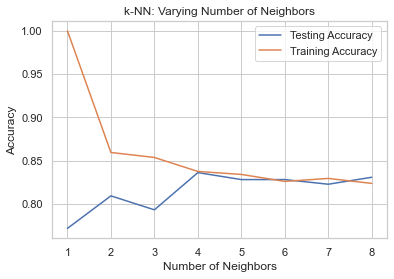

In [124]:
# Simple fine-tuning process
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i,k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    print(i,k)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [125]:
# Create the classifier: knn
knn = KNeighborsClassifier(n_neighbors=4)
# Fit the classifier
knn.fit(X_train, y_train)
# Check accuracy
knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=4)

0.8360215053763441

From above we can find that for 150 days, highest accuracy 83.60% is achieved when using 4 neighbors.

In [126]:
#Using Cross_validation in scikit-learn
cv_results = cross_val_score(knn, X, y, cv =5)
print(cv_results)
print("Accuracy of Model with Cross Validation is:",np.mean(cv_results) * 100)

[0.79435484 0.77822581 0.83064516 0.77822581 0.8582996 ]
Accuracy of Model with Cross Validation is: 80.79502416089852


For **150 days**, cross validation accuracy of Model is 80.80%

For **80 days**, Accuracy of Model is 76.06%

For **60 days**, Accuracy of Model is 72.77%

For **45 days**, Accuracy of Model is 66.32%

For **30 days**, Accuracy of Model is 61.43%

**7.3 Random Forest model**

In [127]:
# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [128]:
# Look at the R^2 scores on train and test
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9669388000403425
0.8273599587019599


For 150 days, from above we can find that 82.66% of the data fit the classification model.

For 80 days, from above we can find that 68.9?% of the data fit the classification model.

For 60 days, from above we can find that ????% of the data fit the classification model.

For 45 days, from above we can find that 61.78% of the data fit the classification model.

For 30 days, from above we can find that 57.50% of the data fit the classification model.

In [129]:
# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [100, 150], 'max_depth': [4, 5], 'max_features': [5, 6], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(X_train, y_train)
    test_scores.append(rfr.score(X_test, y_test))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

RandomForestRegressor(max_depth=4, max_features=5, random_state=42)

RandomForestRegressor(max_depth=4, max_features=5, random_state=42)

RandomForestRegressor(max_depth=4, max_features=5, n_estimators=150,
                      random_state=42)

RandomForestRegressor(max_depth=4, max_features=5, n_estimators=150,
                      random_state=42)

RandomForestRegressor(max_depth=4, max_features=6, random_state=42)

RandomForestRegressor(max_depth=4, max_features=6, random_state=42)

RandomForestRegressor(max_depth=4, max_features=6, n_estimators=150,
                      random_state=42)

RandomForestRegressor(max_depth=4, max_features=6, n_estimators=150,
                      random_state=42)

RandomForestRegressor(max_depth=5, max_features=5, random_state=42)

RandomForestRegressor(max_depth=5, max_features=5, random_state=42)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=150,
                      random_state=42)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=150,
                      random_state=42)

RandomForestRegressor(max_depth=5, max_features=6, random_state=42)

RandomForestRegressor(max_depth=5, max_features=6, random_state=42)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=150,
                      random_state=42)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=150,
                      random_state=42)

0.8198929195563738 {'random_state': 42, 'n_estimators': 100, 'max_features': 6, 'max_depth': 5}


*Best accuracy of 82.00% for **150 days** is achieved at 'random_state': 42, 'n_estimators': 100, 'max_features': 6, 'max_depth': 5*

*Best accuracy of 71.2?% for **80 days** is achieved at 'random_state': 42, 'n_estimators': 100, 'max_features': 6, 'max_depth': 5*

*Best accuracy of 66.93% for **60 days** is achieved at 'random_state': 42, 'n_estimators': 100, 'max_features': 6, 'max_depth': 5*

*Best accuracy of 58.76% for **45 days** is achieved at 'random_state': 42, 'n_estimators': 100, 'max_features': 6, 'max_depth': 5*

*Best accuracy of 55.77% for **30 days** is achieved at 'random_state': 42, 'n_estimators': 150, 'max_features': 6, 'max_depth': 5*

**7.4 Gradient Boosting Regressor**

In [130]:
# Gradient Boosint model implementation
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

GradientBoostingRegressor(max_depth=2, n_estimators=119)

In [131]:
# Cross-validation testing
cv_results = cross_val_score(gbrt_best, X, y, cv =5)
print(cv_results)
print("Accuracy of Model with Cross Validation is:",np.mean(cv_results) * 100)

[0.69498742 0.72312459 0.7572925  0.80981523 0.83330457]
Accuracy of Model with Cross Validation is: 76.37048615852937


**For 150 days, the best accuracy of 76.36% is achieved when max_depth=2, n_estimators=119.**

**For 80 days, the best accuracy of 71.33% is achieved when max_depth=2, n_estimators=73.**

**For 60 days, the best accuracy of 65.98% is achieved when max_depth=2, n_estimators=52.**

**For 45 days, the best accuracy of 60.39% is achieved when max_depth=2, n_estimators=119.**

**For 30 days, the best accuracy of 53.62% is achieved when max_depth=2, n_estimators=116.**

**Naive Bayes Implementation**

In [132]:
# Naive Bayes model implementation
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
cv_results = cross_val_score(clf, X, y, cv =5)
print(cv_results)
print("Accuracy of Model with Cross Validation is:",np.mean(cv_results) * 100)

[0.4516129  0.41129032 0.51209677 0.46774194 0.46963563]
Accuracy of Model with Cross Validation is: 46.24755126028471


From above we can find the Naive Bayes solid and basic classifier could reach 46.25% accuracy.

**Random Model**

In [135]:
# Majority Class random guessing
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='most_frequent')
# Cross-validation testing
cv_results = cross_val_score(model, X, y, cv =5)
print(cv_results)
print("Accuracy of Model with Cross Validation is:",np.mean(cv_results) * 100)

[0.27822581 0.27822581 0.27822581 0.27822581 0.27935223]
Accuracy of Model with Cross Validation is: 27.84510905054199


In [136]:
# Random Class guessing
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='stratified')
# Cross-validation testing
cv_results = cross_val_score(model, X, y, cv =5)
print(cv_results)
print("Accuracy of Model with Cross Validation is:",np.mean(cv_results) * 100)

[0.24596774 0.26612903 0.22983871 0.29435484 0.23076923]
Accuracy of Model with Cross Validation is: 25.34119106699752


In [137]:
# Random Guess
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='uniform')
# Cross-validation testing
cv_results = cross_val_score(model, X, y, cv =5)
print(cv_results)
print("Accuracy of Model with Cross Validation is:",np.mean(cv_results) * 100)

[0.20564516 0.23790323 0.22983871 0.25403226 0.27935223]
Accuracy of Model with Cross Validation is: 24.135431631187153


**From above we can find for random model:**

Majority Class: achieved 27.85% accuracy.

Select Random Class: achieved 26.07% accuracy.

Random Guess: achieved 24.06% accuracy.